## Check for feature importance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import plotly.io as pio
pio.renderers.default='notebook'
from plotly.subplots import make_subplots
import folium
from statsmodels.graphics.gofplots import qqplot

import geopy.distance

import folium
import geopy
import branca
import branca.colormap as cm
from sklearn import preprocessing, cluster

In [2]:
tripdata = pd.read_csv("../../dataset/complete_bike_sharing.csv")
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353897 entries, 0 to 353896
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tripduration        353897 non-null  float64
 1   start_station_id    353897 non-null  object 
 2   start_station_name  353897 non-null  object 
 3   start_lat           353897 non-null  float64
 4   start_lon           353897 non-null  float64
 5   end_station_id      353897 non-null  object 
 6   end_station_name    353897 non-null  object 
 7   end_lat             353897 non-null  float64
 8   end_lon             353897 non-null  float64
 9   bikeid              353897 non-null  object 
 10  usertype            353897 non-null  object 
 11  hour                353897 non-null  int64  
 12  min                 353897 non-null  int64  
 13  temp                353897 non-null  float64
 14  feelslike           353897 non-null  float64
 15  dew                 353897 non-nul

In [3]:
tripdata.head(3)

tripduration start_station_id start_station_name  start_lat  start_lon  \
0         15.53          ss_3183     Exchange Place  40.716247 -74.033459   
1          9.17          ss_3183     Exchange Place  40.716247 -74.033459   
2          8.50          ss_3183     Exchange Place  40.716247 -74.033459   

  end_station_id end_station_name    end_lat    end_lon   bikeid  ...  \
0        es_3199     Newport Pkwy  40.728745 -74.032108  b_31929  ...   
1        es_3199     Newport Pkwy  40.728745 -74.032108  b_31845  ...   
2        es_3199     Newport Pkwy  40.728745 -74.032108  b_31708  ...   

         date      dist  birthyear  years_old  age_group         holiday  \
0  2018-01-01  1.084267       1992         26      20-29  New Year's Day   
1  2018-01-01  1.084267       1969         49      40-49  New Year's Day   
2  2018-01-01  1.084267       1946         72        65+  New Year's Day   

      day    month  seasons  gender  
0  Monday  January   winter    male  
1  Monday  January   winter  female  
2  Monday  January   winter    male  

[3 rows x 39 columns]

## Looking for outliers

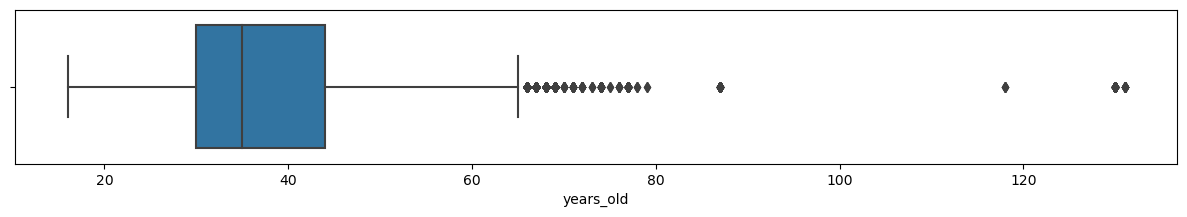

In [4]:
plt.figure(figsize = (15,2))
sns.boxplot(tripdata['years_old'])
plt.show()

In [5]:
tripdata[tripdata['years_old'] >=65]

tripduration start_station_id start_station_name  start_lat  \
2               8.50          ss_3183     Exchange Place  40.716247   
179             8.37          ss_3183     Exchange Place  40.716247   
236             5.25          ss_3183     Exchange Place  40.716247   
259             7.57          ss_3183     Exchange Place  40.716247   
288             8.22          ss_3183     Exchange Place  40.716247   
...              ...              ...                ...        ...   
353115         10.80          ss_3640     Journal Square  40.733670   
353161          9.25          ss_3640     Journal Square  40.733670   
353481          9.05          ss_3679         Bergen Ave  40.722104   
353670         10.20          ss_3681           Grand St  40.715178   
353771         20.38          ss_3681           Grand St  40.715178   

        start_lon end_station_id end_station_name    end_lat    end_lon  \
2      -74.033459        es_3199     Newport Pkwy  40.728745 -74.032108   
179    -74.033459        es_3199     Newport Pkwy  40.728745 -74.032108   
236    -74.033459        es_3272     Jersey & 3rd  40.723332 -74.045953   
259    -74.033459        es_3199     Newport Pkwy  40.728745 -74.032108   
288    -74.033459        es_3199     Newport Pkwy  40.728745 -74.032108   
...           ...            ...              ...        ...        ...   
353115 -74.062500        es_3210   Pershing Field  40.742677 -74.051789   
353161 -74.062500        es_3210   Pershing Field  40.742677 -74.051789   
353481 -74.071455        es_3195          Sip Ave  40.730743 -74.063784   
353670 -74.037683        es_3185        City Hall  40.717732 -74.043845   
353771 -74.037683        es_3273     Manila & 1st  40.721651 -74.042884   

         bikeid  ...        date      dist  birthyear  years_old  age_group  \
2       b_31708  ...  2018-01-01  1.084267       1946         72        65+   
179     b_31766  ...  2018-01-11  1.084267       1941         77        65+   
236     b_26288  ...  2018-01-14  1.228772       1952         66        65+   
259     b_31822  ...  2018-01-16  1.084267       1941         77        65+   
288     b_31903  ...  2018-01-17  1.084267       1941         77        65+   
...         ...  ...         ...       ...        ...        ...        ...   
353115  b_29497  ...  2018-12-24  0.956178       1950         68        65+   
353161  b_26245  ...  2018-12-30  0.956178       1950         68        65+   
353481  b_26304  ...  2018-12-10  0.870442       1953         65      60-64   
353670  b_26298  ...  2018-12-12  0.577848       1953         65      60-64   
353771  b_29245  ...  2018-12-22  0.617169       1947         71        65+   

               holiday        day     month  seasons  gender  
2       New Year's Day     Monday   January   winter    male  
179         No Holiday   Thursday   January   winter  female  
236         No Holiday     Sunday   January   winter    male  
259         No Holiday    Tuesday   January   winter  female  
288         No Holiday  Wednesday   January   winter  female  
...                ...        ...       ...      ...     ...  
353115      No Holiday     Monday  December   winter    male  
353161      No Holiday     Sunday  December   winter    male  
353481      No Holiday     Monday  December   winter  female  
353670      No Holiday  Wednesday  December   winter  female  
353771      No Holiday   Saturday  December   winter    male  

[3464 rows x 39 columns]

In [9]:
tripdata.drop(tripdata[tripdata['years_old'] >=65].index, inplace=True)

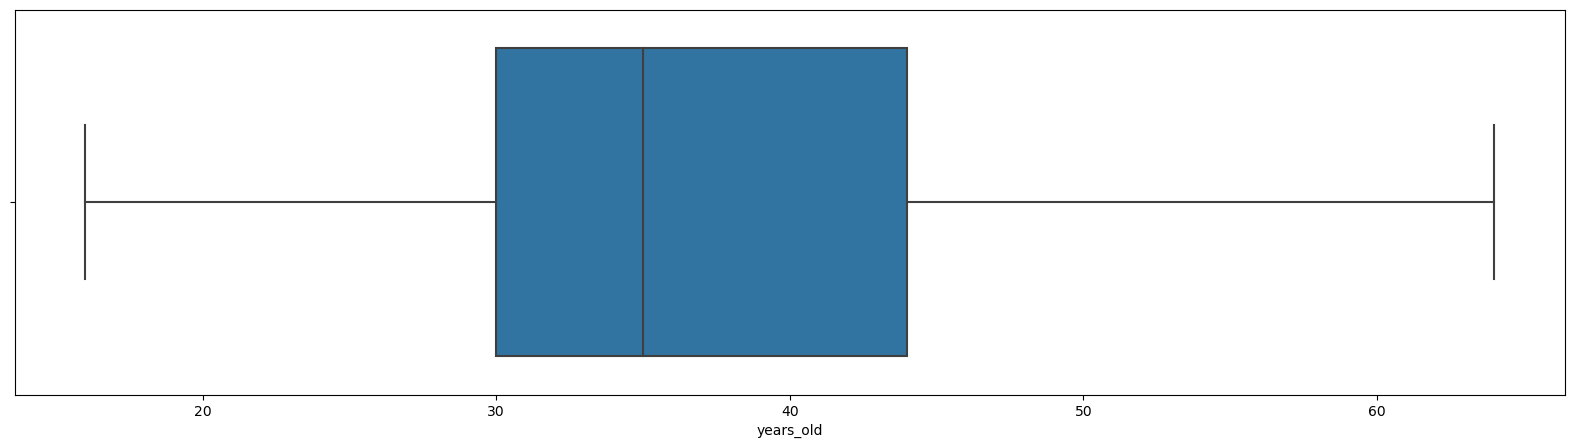

In [10]:
plt.figure(figsize = (20,5))
sns.boxplot(tripdata['years_old'])
plt.show()

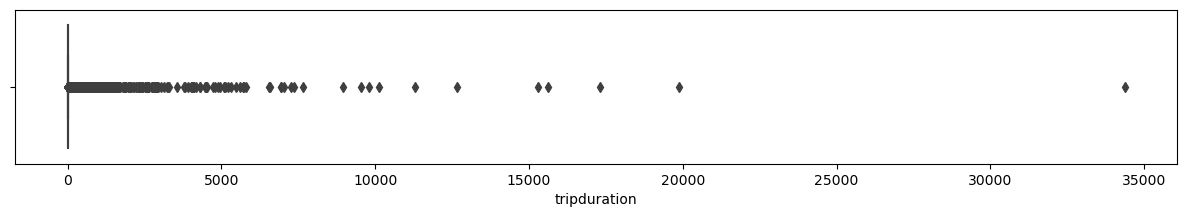

In [11]:
plt.figure(figsize = (15,2))
sns.boxplot(tripdata['tripduration'])
plt.show()

In [15]:
data = tripdata.sort_values(by=['tripduration'])

In [16]:
data.shape

(350433, 39)

In [17]:
np.percentile(data['tripduration'], 90)

16.53

In [18]:
selected_df = data[data['tripduration'] <=16.53].reset_index()

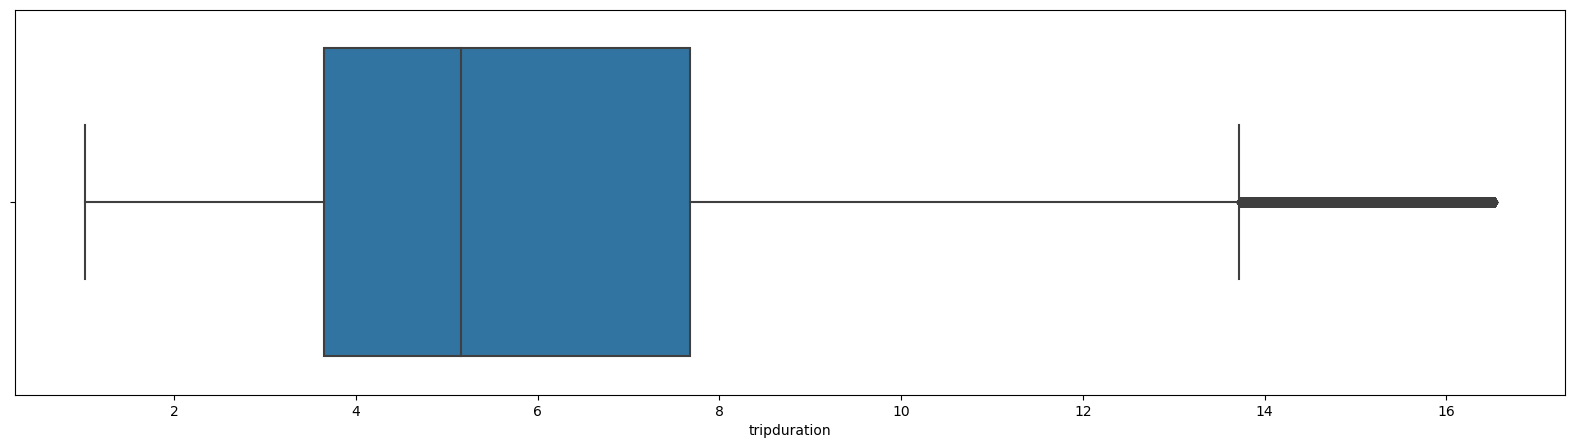

In [19]:
plt.figure(figsize = (20,5))
sns.boxplot(selected_df['tripduration'])
plt.show()

In [13]:
selected_df.shape

NameError: name 'selected_df' is not defined

In [12]:
plt.figure(figsize = (20,5))
sns.boxplot(np.log(selected_df['tripduration']))
plt.show()

NameError: name 'selected_df' is not defined

<Figure size 2000x500 with 0 Axes>

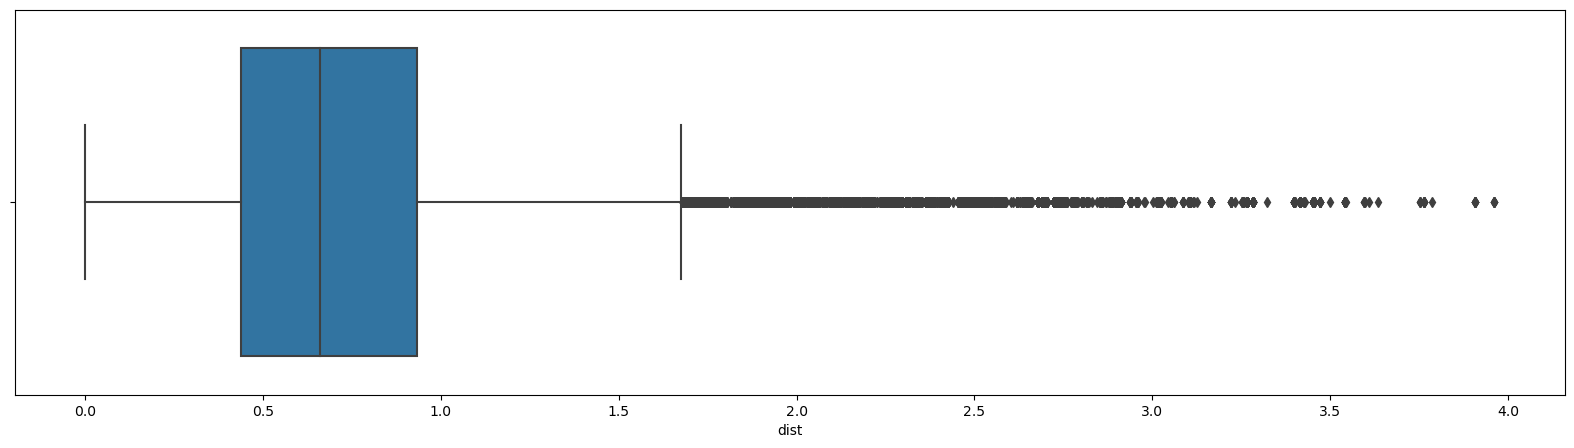

In [16]:
plt.figure(figsize = (20,5))
sns.boxplot(selected_df['dist'])
plt.show()

### Check for start stations most

In [31]:
### 59 unique stations are being used
selected_df['start_station_id'].unique() 

array(['ss_3273', 'ss_3198', 'ss_3213', 'ss_3183', 'ss_3272', 'ss_3209',
       'ss_3275', 'ss_3214', 'ss_3269', 'ss_3270', 'ss_3185', 'ss_3203',
       'ss_3186', 'ss_3201', 'ss_3207', 'ss_3195', 'ss_3267', 'ss_3184',
       'ss_3200', 'ss_3192', 'ss_3220', 'ss_3210', 'ss_3211', 'ss_3187',
       'ss_3278', 'ss_3194', 'ss_3202', 'ss_3483', 'ss_3694', 'ss_3199',
       'ss_3679', 'ss_3279', 'ss_3681', 'ss_3426', 'ss_3640', 'ss_3281',
       'ss_3639', 'ss_3276', 'ss_3193', 'ss_3225', 'ss_3205', 'ss_3268',
       'ss_3196', 'ss_3638', 'ss_3212', 'ss_3206', 'ss_3678', 'ss_3280',
       'ss_3677', 'ss_3481', 'ss_3277', 'ss_3191', 'ss_3188', 'ss_3271',
       'ss_3190', 'ss_3189', 'ss_3274', 'ss_3216', 'ss_3217'],
      dtype=object)

In [38]:
stations_df = pd.DataFrame()
stations_df = selected_df.groupby(['start_station_id']).size().reset_index(name = 'famous stations')
stations_df = stations_df.sort_values('famous stations', ascending = False)
stations_df = stations_df[:10]
stations_df['start_station_id'] = stations_df['start_station_id'].astype(str)
stations_df['start_station_id'] = (stations_df['start_station_id'])
stations_df = stations_df.reset_index()
stations_df['start_station_id'].values
##Only consider top 10 stations into account rest will be considered as 

array(['ss_3186', 'ss_3203', 'ss_3195', 'ss_3183', 'ss_3202', 'ss_3639',
       'ss_3267', 'ss_3276', 'ss_3211', 'ss_3187'], dtype=object)

### replace rest other stations into other

In [42]:
start_stations = ['ss_3186', 'ss_3203', 'ss_3195', 'ss_3183', 'ss_3202', 'ss_3639',
       'ss_3267', 'ss_3276', 'ss_3211', 'ss_3187']
def replace_top_10_start_stations(x):
    if x not in start_stations:
        x = 'others'
    return x;
selected_df['start_station_id'] = selected_df['start_station_id'].apply(replace_top_10_start_stations)

In [44]:
selected_df['start_station_id'].unique()

array(['others', 'ss_3183', 'ss_3203', 'ss_3186', 'ss_3195', 'ss_3267',
       'ss_3211', 'ss_3187', 'ss_3202', 'ss_3639', 'ss_3276'],
      dtype=object)

### Check for end stations most

In [36]:
### 59 unique stations are being used
selected_df['end_station_id'].unique() 

array(['es_3273', 'es_3198', 'es_3185', 'es_3183', 'es_3211', 'es_3269',
       'es_3187', 'es_3214', 'es_3278', 'es_3272', 'es_3270', 'es_3186',
       'es_3213', 'es_3203', 'es_3201', 'es_3207', 'es_3195', 'es_3267',
       'es_3184', 'es_3200', 'es_3209', 'es_3192', 'es_3220', 'es_3210',
       'es_3275', 'es_3194', 'es_3202', 'es_3279', 'es_3694', 'es_3199',
       'es_3679', 'es_3483', 'es_3681', 'es_3426', 'es_3640', 'es_3281',
       'es_3639', 'es_3276', 'es_3193', 'es_3225', 'es_3205', 'es_3268',
       'es_3196', 'es_3638', 'es_3212', 'es_3206', 'es_3678', 'es_3280',
       'es_3481', 'es_3277', 'es_3677', 'es_3191', 'es_3190', 'es_3189',
       'es_3271', 'es_3217', 'es_3188', 'es_3274', 'es_3216', 'es_327',
       'es_146'], dtype=object)

In [37]:
stations_df = pd.DataFrame()
stations_df = selected_df.groupby(['end_station_id']).size().reset_index(name = 'famous stations')
stations_df = stations_df.sort_values('famous stations', ascending = False)
stations_df = stations_df[:10]
stations_df['end_station_id'] = stations_df['end_station_id'].astype(str)
stations_df['end_station_id'] = (stations_df['end_station_id'])
stations_df = stations_df.reset_index()
stations_df['end_station_id'].values

array(['es_3186', 'es_3183', 'es_3203', 'es_3195', 'es_3202', 'es_3639',
       'es_3211', 'es_3276', 'es_3185', 'es_3187'], dtype=object)

In [45]:
end_stations = ['es_3186', 'es_3183', 'es_3203', 'es_3195', 'es_3202', 'es_3639',
       'es_3211', 'es_3276', 'es_3185', 'es_3187']
def replace_top_10_end_stations(x):
    if x not in end_stations:
        x = 'others'
    return x;
selected_df['end_station_id'] = selected_df['end_station_id'].apply(replace_top_10_end_stations)

In [46]:
selected_df['end_station_id'].unique()

array(['others', 'es_3185', 'es_3183', 'es_3211', 'es_3187', 'es_3186',
       'es_3203', 'es_3195', 'es_3202', 'es_3639', 'es_3276'],
      dtype=object)

## Check top 10 bike replace rest with others

In [47]:
bike_df = pd.DataFrame()
bike_df = selected_df.groupby(['bikeid']).size().reset_index(name = 'famous bikes')
bike_df = bike_df.sort_values('famous bikes', ascending = False)
bike_df = bike_df[:10]
bike_df['bikeid'] = bike_df['bikeid'].astype(str)
bike_df['bikeid'] = (bike_df['bikeid'])
bike_df = bike_df.reset_index()
bike_df['bikeid'].values

array(['b_26155', 'b_26288', 'b_29608', 'b_29598', 'b_29586', 'b_29595',
       'b_29583', 'b_29602', 'b_29669', 'b_29662'], dtype=object)

In [48]:
top_bikes = ['b_26155', 'b_26288', 'b_29608', 'b_29598', 'b_29586', 'b_29595',
       'b_29583', 'b_29602', 'b_29669', 'b_29662']
def replace_top_10_bikes(x):
    if x not in top_bikes:
        x = 'others'
    return x;
selected_df['bikeid'] = selected_df['bikeid'].apply(replace_top_10_bikes)

In [49]:
selected_df['bikeid'].unique()

array(['others', 'b_26155', 'b_29598', 'b_29608', 'b_26288', 'b_29595',
       'b_29669', 'b_29662', 'b_29602', 'b_29586', 'b_29583'],
      dtype=object)

### Relation between age , trip duration and kind of user ridership 

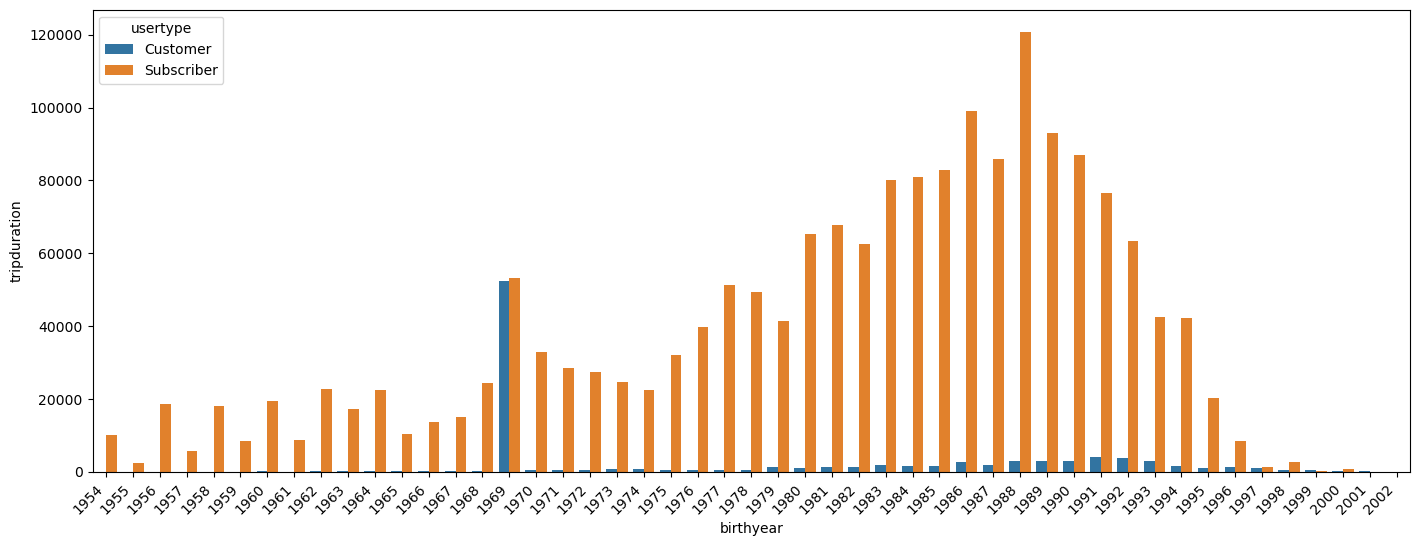

In [20]:
fig, ax = plt.subplots(figsize = (17,6))
df = selected_df.groupby(['birthyear','usertype'])['tripduration'].agg('sum').reset_index()
fig = sns.barplot(data=df, x="birthyear", y="tripduration", hue="usertype", ci=None, ax=ax)
bithyear = df['birthyear'].sort_values().unique()
ax.set_xticklabels(labels=bithyear, rotation=45, ha='right')
plt.show()

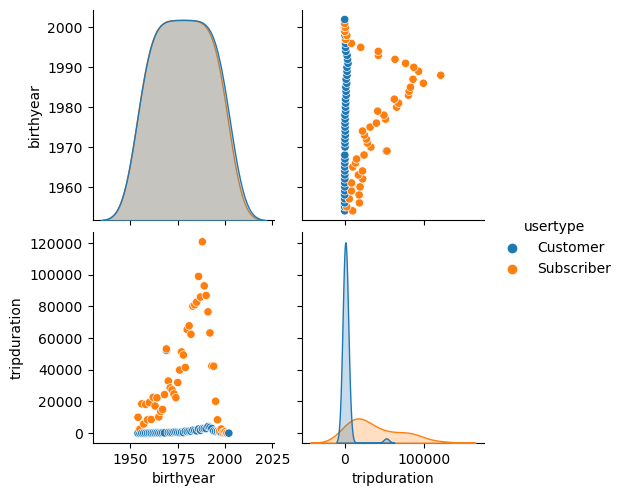

In [21]:
sns.pairplot(df, hue="usertype")

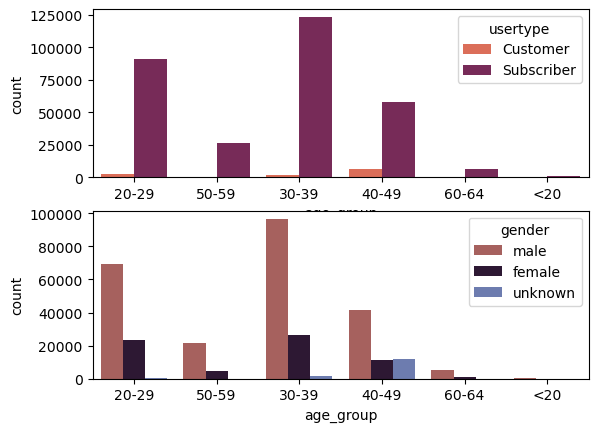

<Figure size 1700x600 with 0 Axes>

In [22]:
sns.color_palette("Set2")
fig, axes = plt.subplots(2,1)
plt.figure(figsize = (17,6))
sns.countplot(selected_df["age_group"],hue=selected_df["usertype"],palette="rocket_r",ax=axes[0])
sns.countplot(selected_df["age_group"],hue=selected_df["gender"],palette="twilight_r",ax=axes[1])
plt.show()

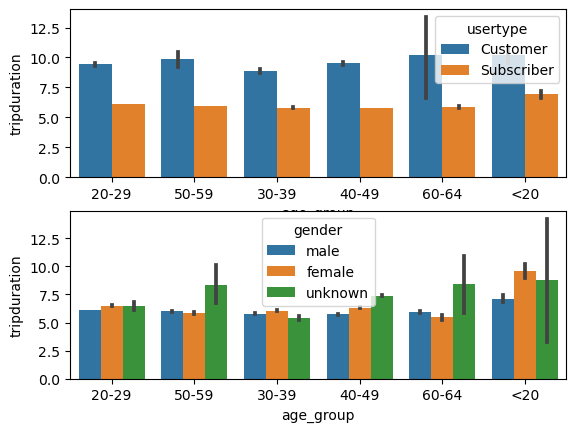

<Figure size 3000x500 with 0 Axes>

In [23]:
sns.color_palette("Set2")
fig, axes = plt.subplots(2,1)
plt.figure(figsize = (30,5))
sns.barplot(data=selected_df,x='age_group', y="tripduration" , hue="usertype" , ax=axes[0])

sns.barplot(data=selected_df,x='age_group', y="tripduration" , hue="gender" , ax=axes[1])
plt.show()

In [24]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=['gender_cat', 'usertype'])

fig.add_trace(
    go.Pie(labels=selected_df['gender'].value_counts().index, values=tripdata['gender'].value_counts(), name="gender"),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=selected_df['usertype'].value_counts().index, values=tripdata['usertype'].value_counts(), name="usertype"),
    row=1, col=2
)


fig.update_layout(title_text='Distribution of trip duration on user type and gender(1 : Male, 2 : Female, 0 : No_Gender)')
fig.show()

In [25]:
User = pd.DataFrame()
User['avg_trip duration'] = round(selected_df.groupby('usertype')['tripduration'].mean())
User = User.reset_index()
User['usertype'] = User['usertype'].astype('object')
User


usertype  avg_trip duration
0    Customer                9.0
1  Subscriber                6.0

In [26]:
User = pd.DataFrame()
User['avg_trip duration'] = round(selected_df.groupby('gender')['tripduration'].mean())
User = User.reset_index()
User['gender'] = User['gender'].astype('object')
User


gender  avg_trip duration
0   female                6.0
1     male                6.0
2  unknown                7.0

#### comments:
1. Overall 72% riders are male where only 21% are female
2. Nearly 94% riders are annual subscribers  where 6 % are single-ride or day pass purchasers.
3. Highest Number of subscriber are in the age group 30-39 and less in age group below 20
4. Highest number of single-ride or day pass purchasers are 40-49 rest other are very less.
5. Age group 30-39 both female and male users.
6. more number of trips durations completed who are below 20 age males and females.
7. more number of rides durations complted by age above 65 age group who are using single-ride or day pass purchasers.
8. Averge trip duration for single-ride or day pass purchasers is more than annual subscribers.

### Find out what are the Peak Bike Rides are!!!?

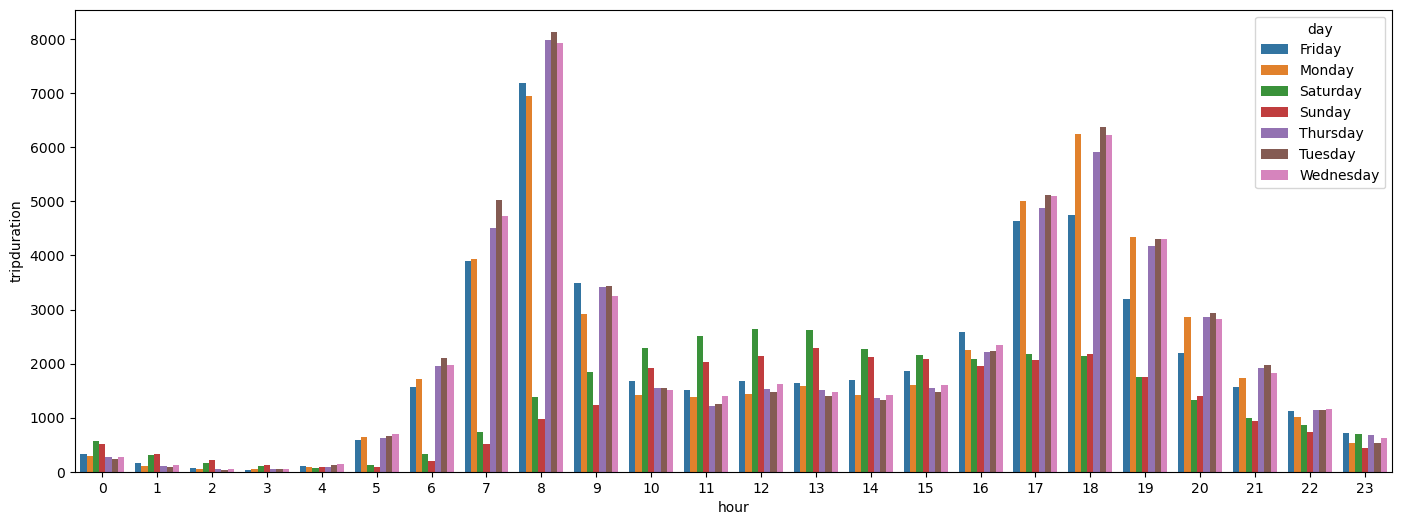

In [27]:
fig, ax = plt.subplots(figsize = (17,6))
df = selected_df.groupby(['hour','day'])['tripduration'].agg('count').reset_index()
fig = sns.barplot(data=df, x="hour", y="tripduration", hue="day", ci=None)
plt.show()

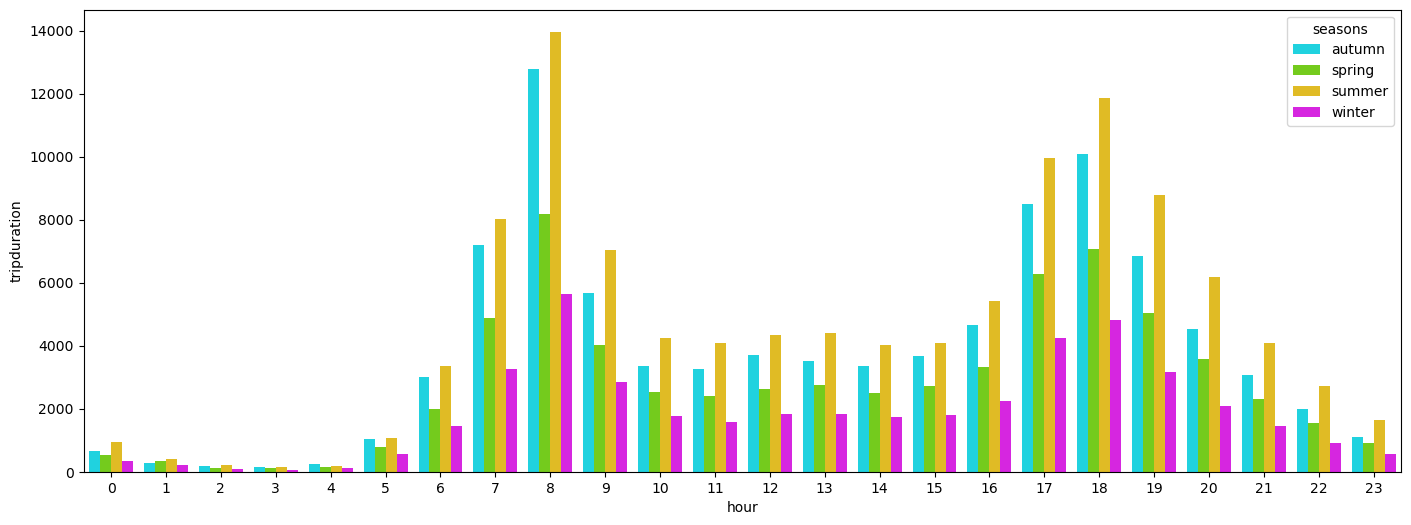

In [28]:
fig, ax = plt.subplots(figsize = (17,6))
df = selected_df.groupby(['hour','seasons'])['tripduration'].agg('count').reset_index()
fig = sns.barplot(data=df, x="hour", y="tripduration", hue="seasons", ci=None, palette="gist_ncar")
plt.show()

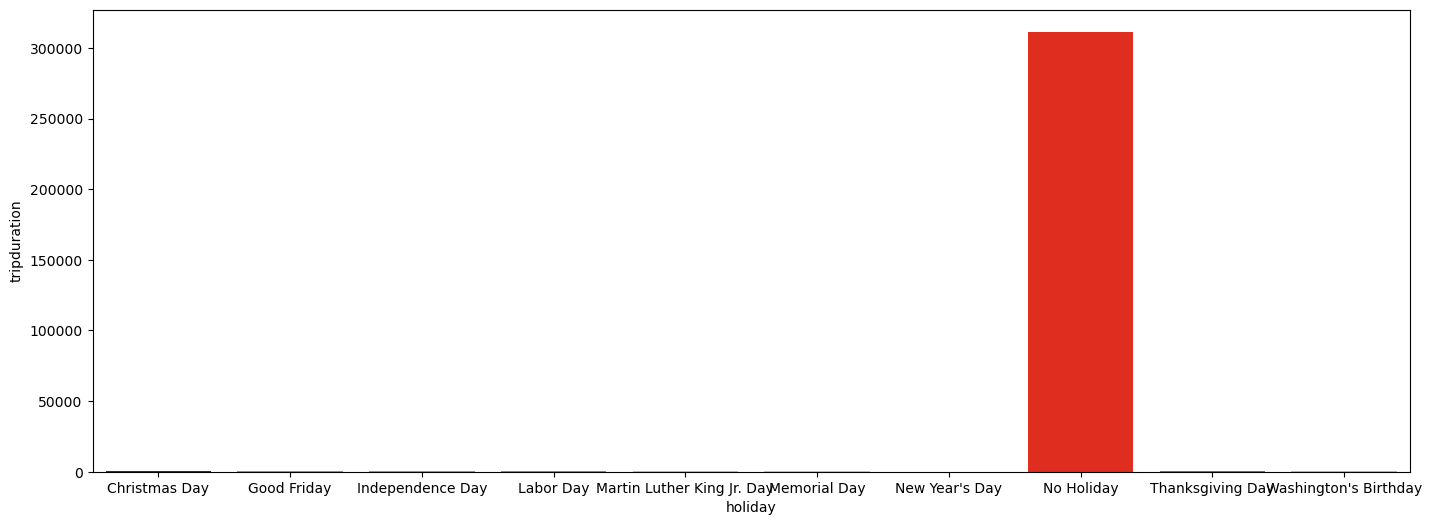

In [29]:
fig, ax = plt.subplots(figsize = (17,6))
df = selected_df.groupby(['holiday'])['tripduration'].agg('count').reset_index()
fig = sns.barplot(data=df, x="holiday", y="tripduration", ci=None, palette="gist_ncar")
plt.show()

#### Comments about peak rides
1. most of the peak hours rides starts in the morning 8am and evening 17-18 pm on weekdays
2. most of the peak hours rides starts in the morning 8am and evening 17-18 pm in summer and Autum seasons
3. Riders used bikes on working days all the time.

### Find out which stations are most famous ?

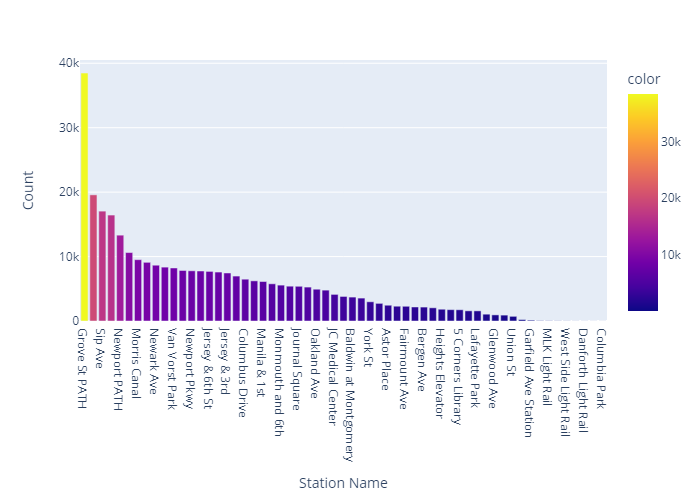

In [30]:
fig = px.bar(x=selected_df["start_station_name"].value_counts().index,
       y=selected_df["start_station_name"].value_counts().values,
       color=selected_df["start_station_name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})
fig.show("png")

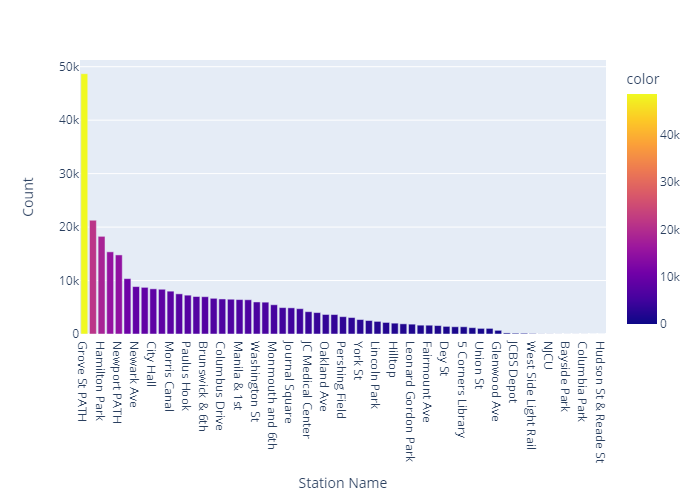

In [31]:
fig = px.bar(x=selected_df["end_station_name"].value_counts().index,
       y=selected_df["end_station_name"].value_counts().values,
       color=selected_df["end_station_name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})
fig.show("png")

In [33]:
trips_df = pd.DataFrame()
trips_df = selected_df.groupby(['start_station_name','end_station_name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips',ascending = False)
trips_df["start_station_name"] = trips_df["start_station_name"].astype(str)
trips_df["end_station_name"] = trips_df["end_station_name"].astype(str)
trips_df["Routes"] = trips_df["start_station_name"] + " to " + trips_df["end_station_name"]
trips_df = trips_df[:20]
trips_df = trips_df.reset_index()
trips_df

index start_station_name  end_station_name  Number of Trips  \
0     844      Hamilton Park     Grove St PATH             7755   
1     797      Grove St PATH     Hamilton Park             5723   
2    1612       Morris Canal    Exchange Place             4479   
3     204    Brunswick & 6th     Grove St PATH             4180   
4    1130    Jersey & 6th St     Grove St PATH             4096   
5     252       Brunswick St     Grove St PATH             3930   
6     518        Dixon Mills     Grove St PATH             3258   
7     625     Exchange Place      Morris Canal             3244   
8    1435   Marin Light Rail     Grove St PATH             3162   
9    2042     Van Vorst Park     Grove St PATH             3076   
10   1529   Monmouth and 6th     Grove St PATH             3038   
11   1510    McGinley Square           Sip Ave             3017   
12    811      Grove St PATH  Marin Light Rail             2999   
13    782      Grove St PATH   Brunswick & 6th             2958   
14    789      Grove St PATH       Dixon Mills             2924   
15    783      Grove St PATH      Brunswick St             2851   
16   1983            Sip Ave   McGinley Square             2697   
17    813      Grove St PATH  Monmouth and 6th             2649   
18    908         Harborside      Newport PATH             2524   
19   1705       Newport PATH     Hamilton Park             2485   

                               Routes  
0      Hamilton Park to Grove St PATH  
1      Grove St PATH to Hamilton Park  
2      Morris Canal to Exchange Place  
3    Brunswick & 6th to Grove St PATH  
4    Jersey & 6th St to Grove St PATH  
5       Brunswick St to Grove St PATH  
6        Dixon Mills to Grove St PATH  
7      Exchange Place to Morris Canal  
8   Marin Light Rail to Grove St PATH  
9     Van Vorst Park to Grove St PATH  
10  Monmouth and 6th to Grove St PATH  
11         McGinley Square to Sip Ave  
12  Grove St PATH to Marin Light Rail  
13   Grove St PATH to Brunswick & 6th  
14       Grove St PATH to Dixon Mills  
15      Grove St PATH to Brunswick St  
16         Sip Ave to McGinley Square  
17  Grove St PATH to Monmouth and 6th  
18         Harborside to Newport PATH  
19      Newport PATH to Hamilton Park

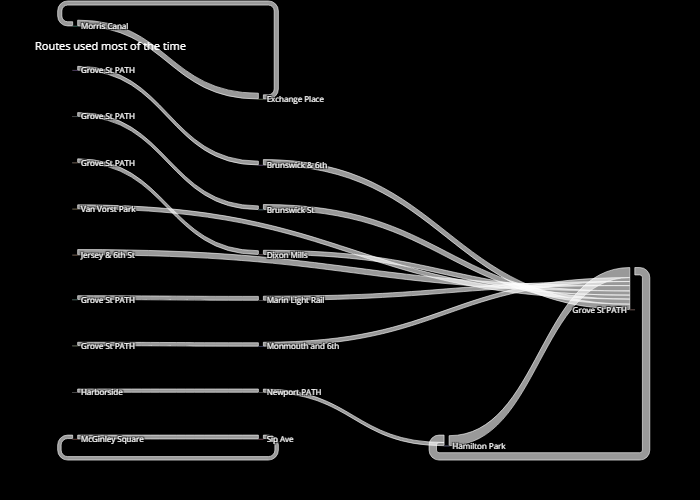

In [32]:
label = ['Hamilton Park', 'Grove St PATH', 'Morris Canal',
           'Brunswick & 6th', 'Jersey & 6th St', 'Brunswick St',
           'Dixon Mills', 'Exchange Place', 'Marin Light Rail',
           'Van Vorst Park', 'Monmouth and 6th', 'McGinley Square',
           'Grove St PATH', 'Grove St PATH', 'Grove St PATH', 'Grove St PATH',
           'Sip Ave', 'Grove St PATH', 'Harborside', 'Newport PATH',
           'Grove St PATH', 'Hamilton Park', 'Exchange Place',
           'Grove St PATH', 'Grove St PATH', 'Grove St PATH', 'Grove St PATH',
           'Morris Canal', 'Grove St PATH', 'Grove St PATH', 'Grove St PATH',
           'Sip Ave', 'Marin Light Rail', 'Brunswick & 6th', 'Dixon Mills',
           'Brunswick St', 'McGinley Square', 'Monmouth and 6th',
           'Newport PATH', 'Hamilton Park']

source = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
target = [1, 0, 7, 1, 1,1, 1, 2, 1, 1,1,16,8,3,6,5,11,10,19,0]
value = [7755, 5723, 4479, 4180, 4096, 3930, 3258, 3244, 3162, 3076, 3038,
       3017, 2999, 2958, 2924, 2851, 2697, 2649, 2524, 2485]

link = dict(source = source, target = target, value = value)
node = dict(label = label, pad=50, thickness=5)
data = go.Sankey(link = link, node=node)



fig = go.Figure(data)
fig.update_layout(
    
    title="Routes used most of the time",
    font=dict(size = 8, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)
fig.show("png")

In [33]:
selected_df.columns

Index(['index', 'tripduration', 'start_station_id', 'start_station_name',
       'start_lat', 'start_lon', 'end_station_id', 'end_station_name',
       'end_lat', 'end_lon', 'bikeid', 'usertype', 'hour', 'min', 'temp',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow',
       'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex', 'conditions', 'date', 'dist',
       'birthyear', 'years_old', 'age_group', 'holiday', 'day', 'month',
       'seasons', 'gender'],
      dtype='object')

In [34]:
df_sub = selected_df[['start_station_name','end_station_name', 'start_lat','start_lon','end_lat','end_lon']]
df_sub['both'] = df_sub['start_station_name'] + ', ' + df_sub['end_station_name']
df_sub = df_sub.groupby(['start_station_name','end_station_name', 'start_lat','start_lon','end_lat','end_lon'])['both'].count().reset_index(name='Counts of trips')

df_sub = df_sub.nsmallest(100, columns=['Counts of trips'])
df_sub.head()

start_station_name         end_station_name  start_lat  start_lon  \
9        5 Corners Library  Communipaw & Berry Lane  40.734961 -74.059503   
23       5 Corners Library           Jackson Square  40.734961 -74.059503   
58             Astor Place              Dixon Mills  40.719282 -74.071262   
82             Astor Place           Pershing Field  40.719282 -74.071262   
115  Baldwin at Montgomery      Leonard Gordon Park  40.723659 -74.064194   

       end_lat    end_lon  Counts of trips  
9    40.714358 -74.066611                1  
23   40.711130 -74.078900                1  
58   40.721630 -74.049968                1  
82   40.742677 -74.051789                1  
115  40.745910 -74.057271                1

In [35]:
map1 = folium.Map(

    location=[40.732775,-74.105973],
    tiles='cartodbpositron',
    zoom_start= 15,
    max_width= 150, max_height=150
)


df_sub.apply(lambda row:folium.CircleMarker(location=[row["end_lat"], row["end_lon"]], popup=row["end_station_name"],radius=5, color="Black").add_to(map1), axis=1)
df_sub.apply(lambda row:folium.CircleMarker(location=[row["start_lat"], row["start_lon"]],popup=row["start_station_name"]).add_to(map1), axis=1)

map1

### comments on famous stations:
1. Grove St Path is the most used station than other stations and some of the stations no single trip is being recorded
2. Grove St PATH is the most popular route where end and start rides taken place.

### Which bikes are used most?

In [19]:
bike_use_df = pd.DataFrame()
bike_use_df = selected_df.groupby(['bikeid']).size().reset_index(name = 'Number of Times Used')
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False)
bike_use_df = bike_use_df[:10]
bike_use_df['bikeid'] = bike_use_df['bikeid'].astype(str)
bike_use_df['bikeid'] = (bike_use_df['bikeid'])
bike_use_df = bike_use_df.reset_index()
bike_use_df['bikeid'].values

array(['b_26155', 'b_26288', 'b_29608', 'b_29598', 'b_29586', 'b_29595',
       'b_29583', 'b_29602', 'b_29669', 'b_29662'], dtype=object)

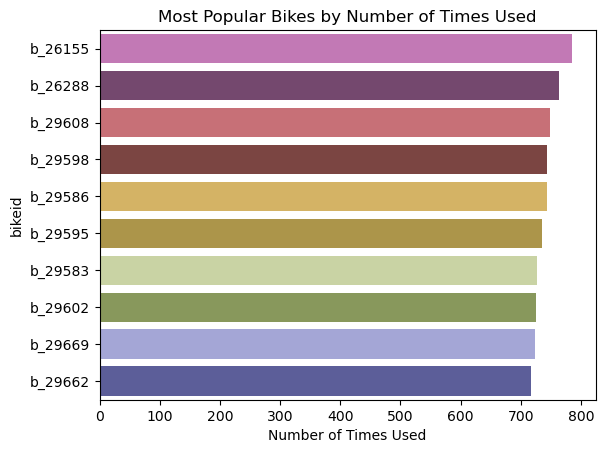

In [38]:
ax8 = sns.barplot('Number of Times Used', 'bikeid',data = bike_use_df, palette="tab20b_r")
ax8.set_title('Most Popular Bikes by Number of Times Used')
plt.show()

### How weather affecting the rides?

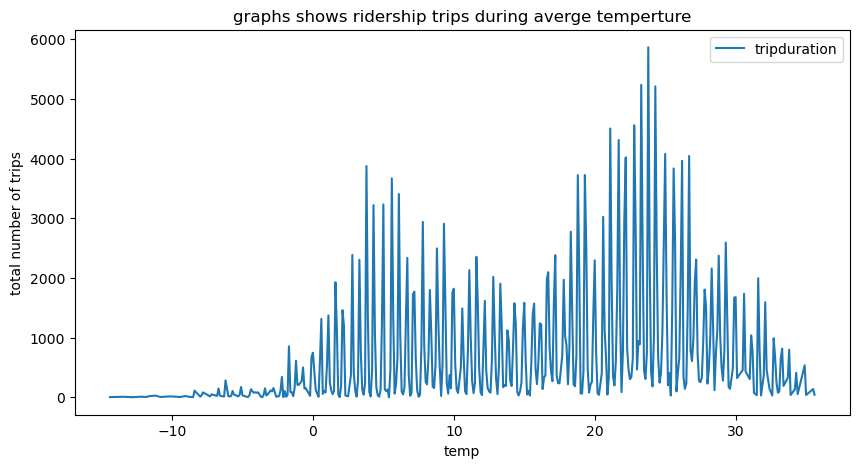

In [39]:
df = selected_df.groupby(['temp'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='temp', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during averge temperture')
ax.set(xlabel='temp', ylabel='total number of trips')
plt.show()          

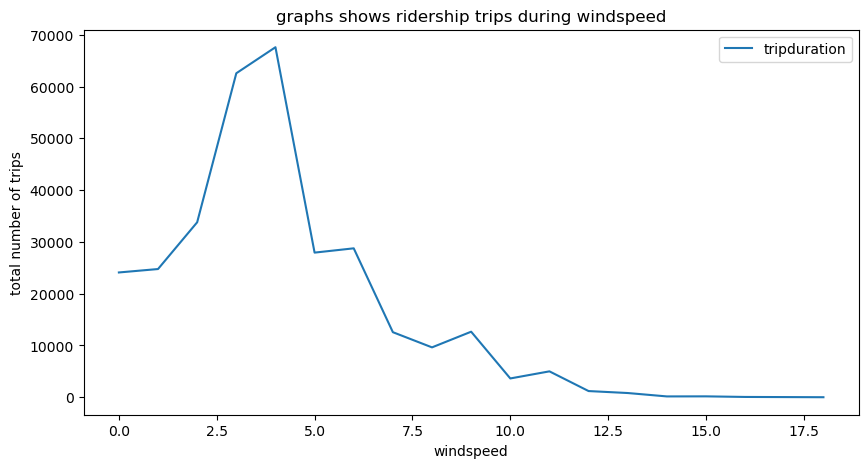

In [40]:
df = selected_df.groupby(['windspeed'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='windspeed', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during windspeed')
ax.set(xlabel='windspeed', ylabel='total number of trips')
plt.show()    

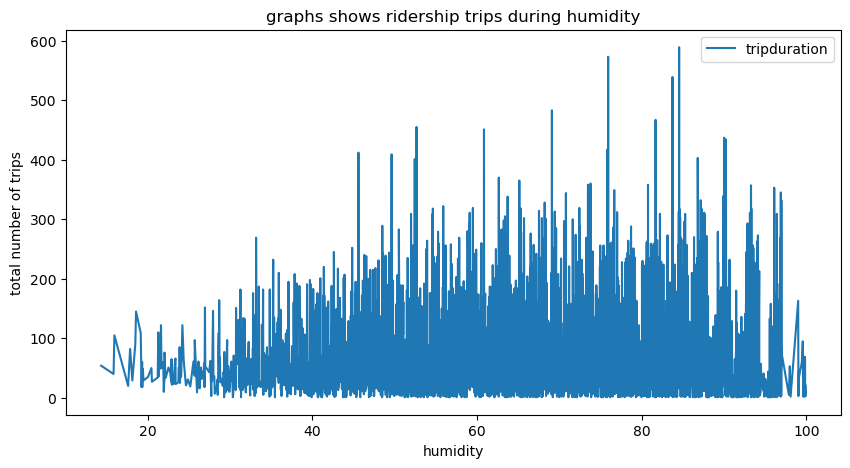

In [41]:
df = selected_df.groupby(['humidity'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='humidity', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during humidity')
ax.set(xlabel='humidity', ylabel='total number of trips')
plt.show()      

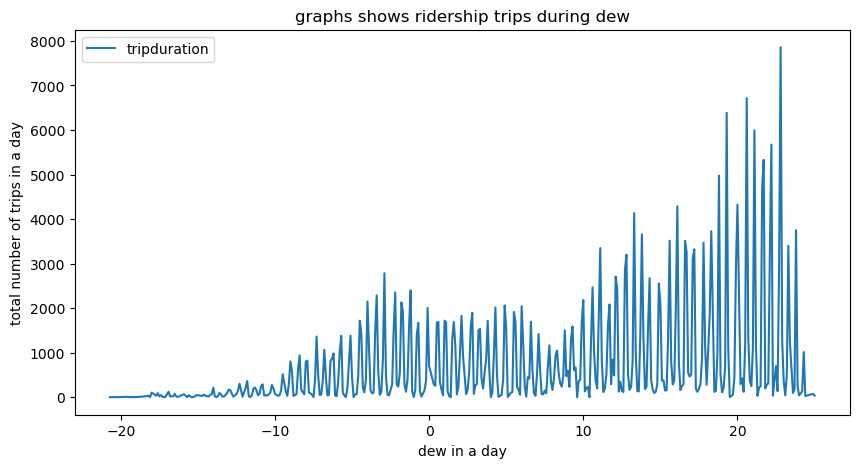

In [42]:
df = selected_df.groupby(['dew'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='dew', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during dew')
plt.xlabel("dew in a day")
plt.ylabel('total number of trips in a day');  

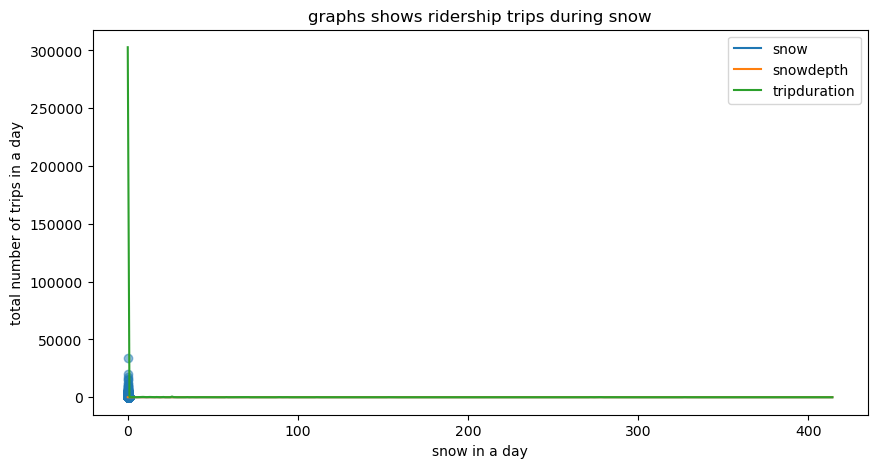

In [43]:
df = selected_df.groupby(['snow','snowdepth'])['tripduration'].agg('count').reset_index()
df
ax = df.plot(figsize=(10,5),title='graphs shows ridership trips during snow')
plt.scatter(tripdata['snow'], tripdata['tripduration'], alpha=0.5, cmap='viridis')
plt.xlabel("snow in a day")
plt.ylabel('total number of trips in a day');

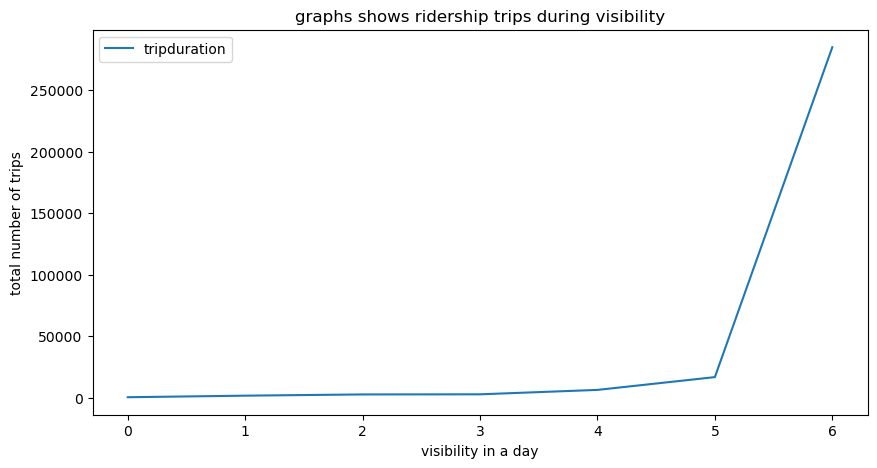

In [44]:
df = selected_df.groupby(['visibility'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='visibility' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during visibility')
plt.xlabel("visibility in a day")
plt.ylabel('total number of trips'); 

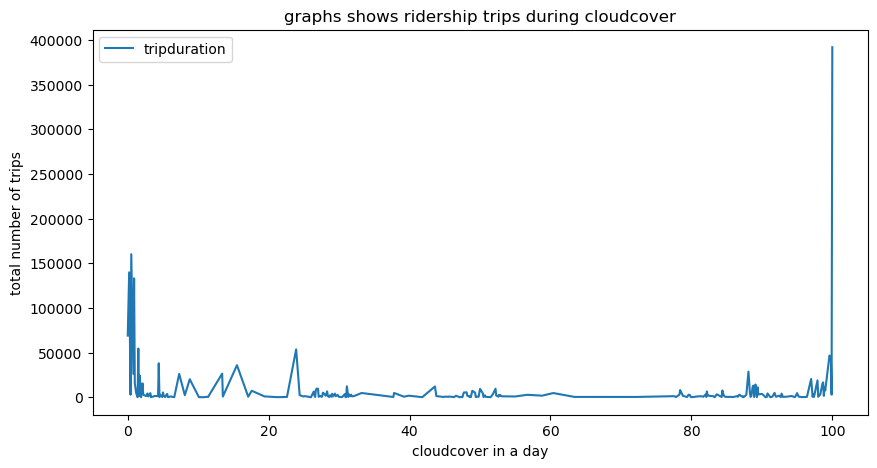

In [45]:
df = selected_df.groupby(['cloudcover'])['tripduration'].agg('sum').reset_index()
ax = df.plot(x='cloudcover' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during cloudcover')
plt.xlabel("cloudcover in a day")
plt.ylabel('total number of trips');  

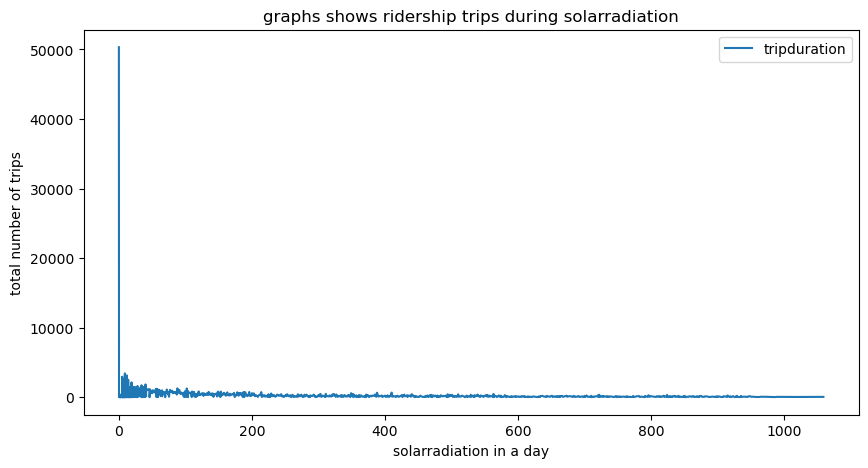

In [46]:
df = selected_df.groupby(['solarradiation'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='solarradiation' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during solarradiation')
plt.xlabel("solarradiation in a day")
plt.ylabel('total number of trips');  

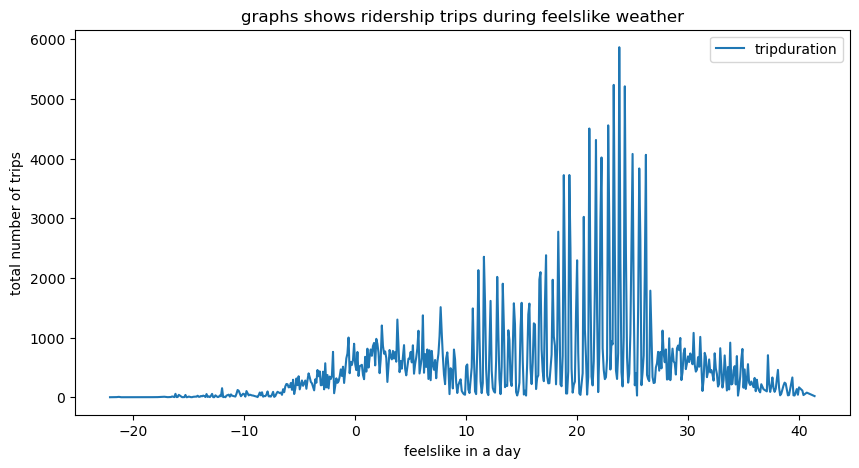

In [48]:
df = selected_df.groupby(['feelslike'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='feelslike' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during feelslike weather')
plt.xlabel("feelslike in a day")
plt.ylabel('total number of trips');  

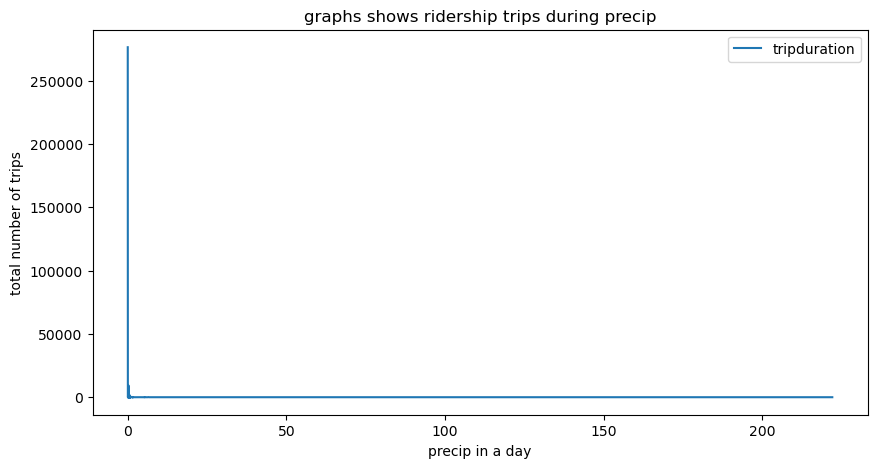

In [49]:
df = selected_df.groupby(['precip'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='precip' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during precip')
plt.xlabel("precip in a day")
plt.ylabel('total number of trips');  

<AxesSubplot:xlabel='tripduration', ylabel='conditions'>

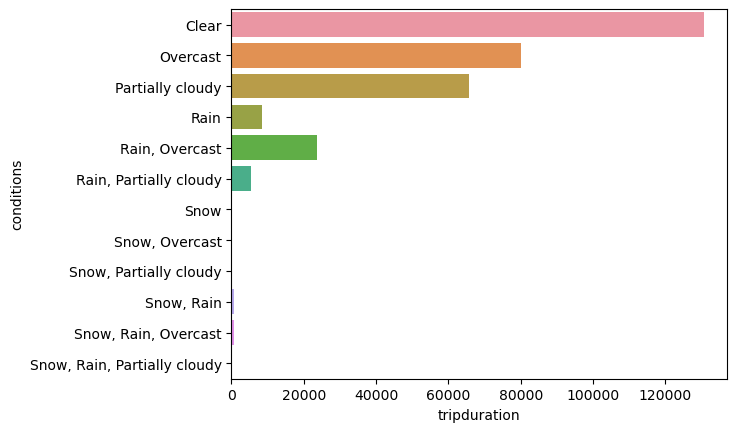

In [50]:
df = selected_df.groupby(['conditions'])['tripduration'].agg('count').reset_index()
plt.xlabel("weather conditions in a day")
plt.ylabel('total number of trips in a day');  
sns.barplot(data=df,x='tripduration', y="conditions")

#### comments on weather data and number of trips reported.

1. When the average temperature in between 20-27 the number of trips are more when avaerge temperture is below zero the trips almost nill.
2. Windspeed and tripduration negitively correlated, when it's below 28mph then higher number of rides are reported.
3. When humidity is between 50-78 % rh repoted good amount of trips.
4. As dew increases trips also incraesing.
5. When there is no snow we have more number of riders than when snow/snow depth reported.
6. Visibilty between 15-16 we have peaks in the trips otherwise the trips are almost Nill.
7. Cloudcover didn't give much value for tripduration but oscilate between 0-100 (when it's 0 and 100 has highest number of rides)
8. When the weather is clear, partly cloud and expected rain has more number of rides reported.


### Check some correlation between the features and target variable tripduration 

In [51]:
selected_df.columns

Index(['index', 'tripduration', 'start_station_id', 'start_station_name',
       'start_lat', 'start_lon', 'end_station_id', 'end_station_name',
       'end_lat', 'end_lon', 'bikeid', 'usertype', 'hour', 'min', 'temp',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow',
       'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex', 'conditions', 'date', 'dist',
       'birthyear', 'years_old', 'age_group', 'holiday', 'day', 'month',
       'seasons', 'gender'],
      dtype='object')

In [52]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df = selected_df.copy()
df['start_station_id']= label_encoder.fit_transform(df['start_station_id'])
df['end_station_id']= label_encoder.fit_transform(df['end_station_id'])
df['bikeid']= label_encoder.fit_transform(df['bikeid'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['usertype']= label_encoder.fit_transform(df['usertype'])
df['day']= label_encoder.fit_transform(df['day'])
df['month']= label_encoder.fit_transform(df['month'])
df['holiday'] = label_encoder.fit_transform(df['holiday'])
df['conditions'] = label_encoder.fit_transform(df['conditions'])               
# df['description'] = label_encoder.fit_transform(df['description'])           
df['seasons'] = label_encoder.fit_transform(df['seasons'])

In [53]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

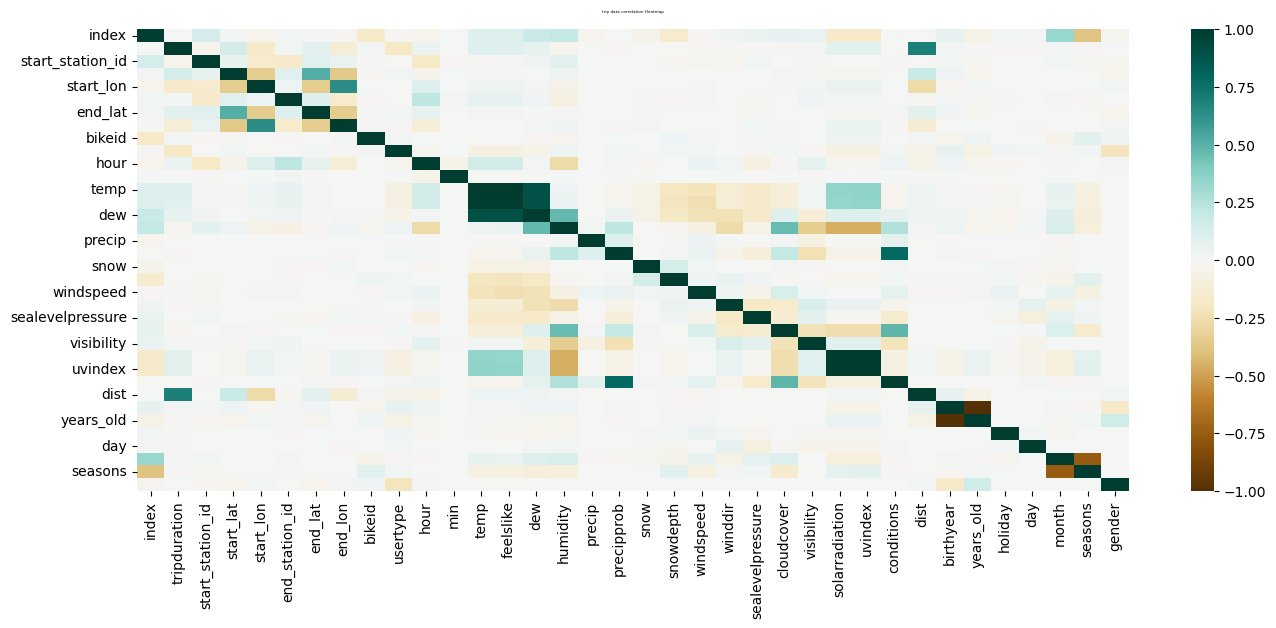

In [54]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr,vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('trip data correlation Heatmap', fontdict={'fontsize':3}, pad=12);

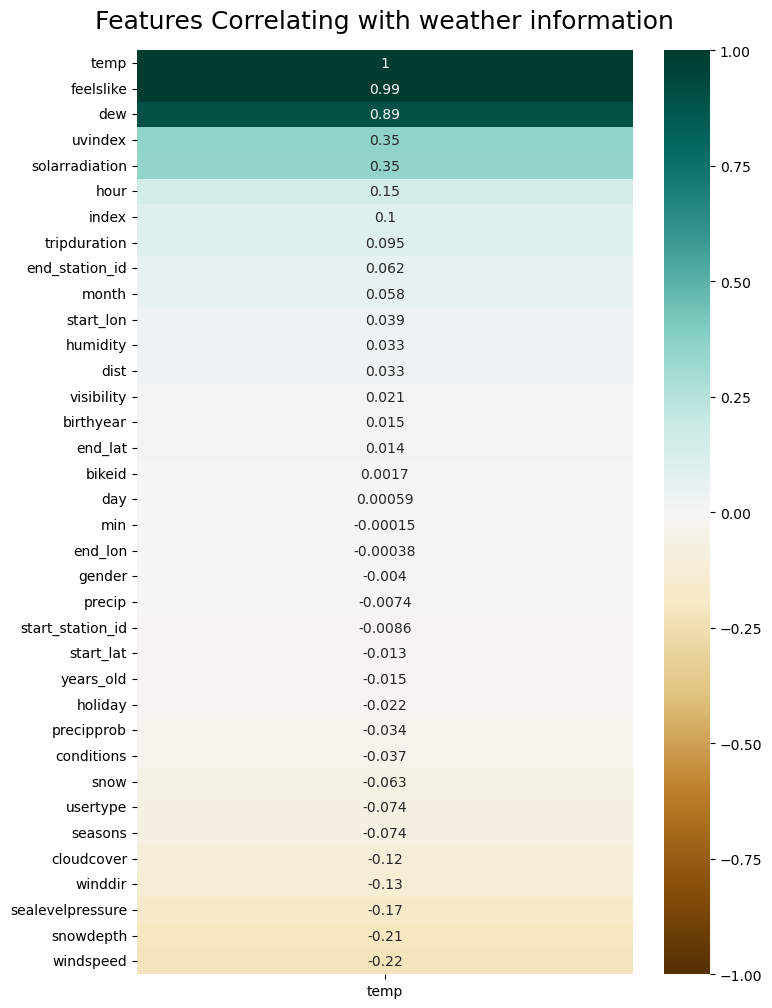

In [55]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['temp']].sort_values(by='temp', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with weather information', fontdict={'fontsize':18}, pad=16);

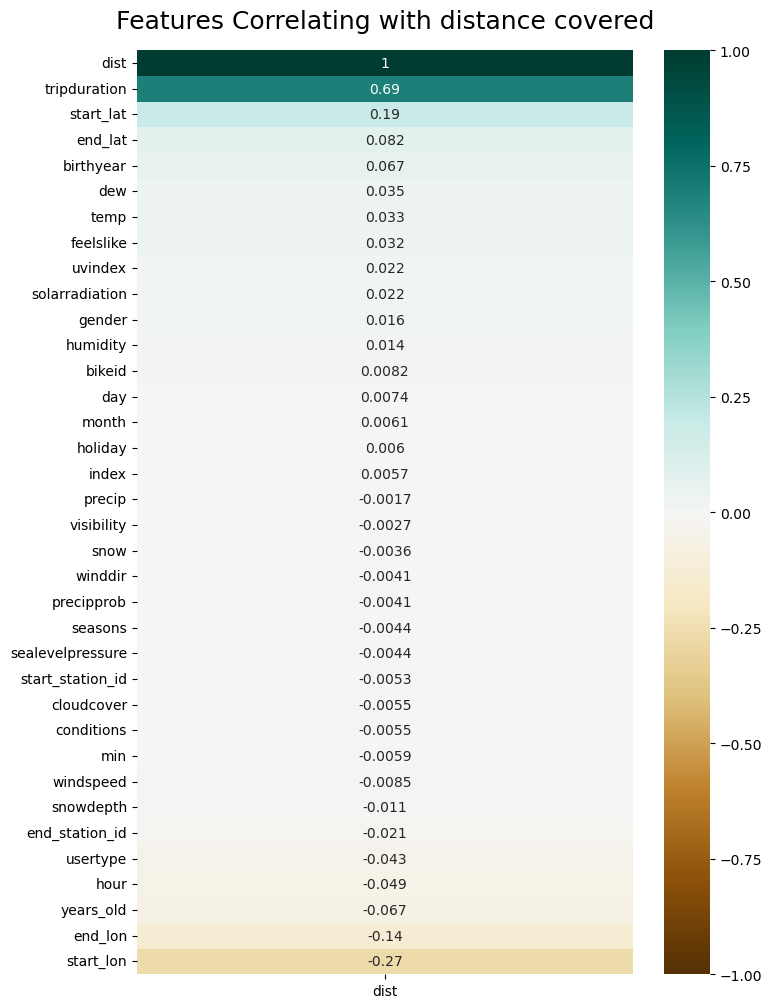

In [56]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['dist']].sort_values(by='dist', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with distance covered', fontdict={'fontsize':18}, pad=16);

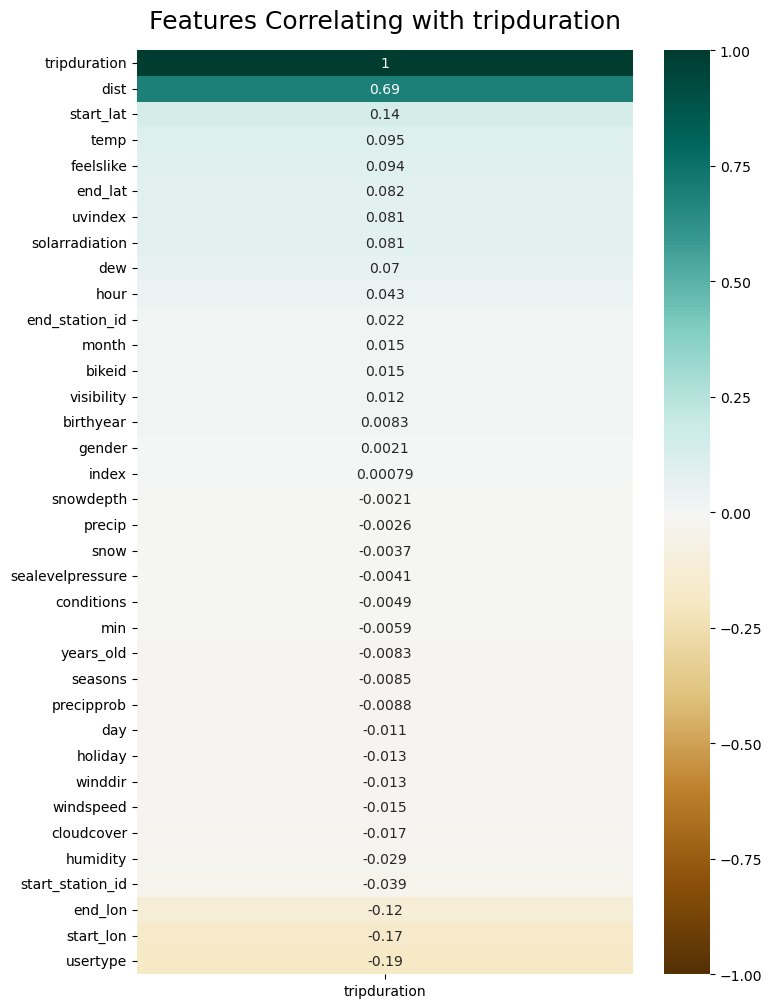

In [57]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['tripduration']].sort_values(by='tripduration', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with tripduration', fontdict={'fontsize':18}, pad=16);

In [58]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315433 entries, 0 to 315432
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               315433 non-null  int64  
 1   tripduration        315433 non-null  float64
 2   start_station_id    315433 non-null  object 
 3   start_station_name  315433 non-null  object 
 4   start_lat           315433 non-null  float64
 5   start_lon           315433 non-null  float64
 6   end_station_id      315433 non-null  object 
 7   end_station_name    315433 non-null  object 
 8   end_lat             315433 non-null  float64
 9   end_lon             315433 non-null  float64
 10  bikeid              315433 non-null  object 
 11  usertype            315433 non-null  object 
 12  hour                315433 non-null  int64  
 13  min                 315433 non-null  int64  
 14  temp                315433 non-null  float64
 15  feelslike           315433 non-nul

In [59]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(selected_df)
categorical_features

['start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bikeid',
 'usertype',
 'conditions',
 'date',
 'age_group',
 'holiday',
 'day',
 'month',
 'seasons',
 'gender']

In [61]:
df_data = selected_df.copy()

In [62]:
# Import association_metrics  
import association_metrics as am
# Convert you str columns to Category columns
df = df_data.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)
df
# df1 = df.drop(['starttime','stoptime','date'], axis=1)
cramersv = am.CramersV(df) 

cat_corr = cramersv.fit()

In [63]:
cat_corr

start_station_id  start_station_name  end_station_id  \
start_station_id            1.000000            1.000000        0.264417   
start_station_name          1.000000            1.000000        0.264417   
end_station_id              0.264417            0.264417        1.000000   
end_station_name            0.264417            0.264417        1.000000   
bikeid                      0.062297            0.062297        0.061234   
usertype                    0.088759            0.088759        0.082877   
conditions                  0.024694            0.024694        0.024774   
date                        0.044965            0.044965        0.044517   
age_group                   0.112696            0.112696        0.112130   
holiday                     0.020759            0.020759        0.018991   
day                         0.046846            0.046846        0.050887   
month                       0.046557            0.046557        0.047393   
seasons                     0.063895            0.063895        0.065986   
gender                      0.108511            0.108511        0.101186   

                    end_station_name    bikeid  usertype  conditions  \
start_station_id            0.264417  0.062297  0.088759    0.024694   
start_station_name          0.264417  0.062297  0.088759    0.024694   
end_station_id              1.000000  0.061234  0.082877    0.024774   
end_station_name            1.000000  0.061234  0.082877    0.024774   
bikeid                      0.061234  1.000000  0.069696    0.081043   
usertype                    0.082877  0.069696  1.000000    0.029499   
conditions                  0.024774  0.081043  0.029499    1.000000   
date                        0.044517  0.092242  0.173568    0.484229   
age_group                   0.112130  0.063896  0.177835    0.011934   
holiday                     0.018991  0.091930  0.046578    0.039258   
day                         0.050887  0.066636  0.121222    0.055432   
month                       0.047393  0.308406  0.066540    0.105509   
seasons                     0.065986  0.388452  0.051218    0.154363   
gender                      0.101186  0.072876  0.445613    0.017207   

                        date  age_group   holiday       day     month  \
start_station_id    0.044965   0.112696  0.020759  0.046846  0.046557   
start_station_name  0.044965   0.112696  0.020759  0.046846  0.046557   
end_station_id      0.044517   0.112130  0.018991  0.050887  0.047393   
end_station_name    0.044517   0.112130  0.018991  0.050887  0.047393   
bikeid              0.092242   0.063896  0.091930  0.066636  0.308406   
usertype            0.173568   0.177835  0.046578  0.121222  0.066540   
conditions          0.484229   0.011934  0.039258  0.055432  0.105509   
date                1.000000   0.057622  1.000000  1.000000  1.000000   
age_group           0.057622   1.000000  0.008331  0.020658  0.037166   
holiday             1.000000   0.008331  1.000000  0.104133  0.135400   
day                 1.000000   0.020658  0.104133  1.000000  0.058235   
month               1.000000   0.037166  0.135400  0.058235  1.000000   
seasons             1.000000   0.036543  0.121203  0.029010  1.000000   
gender              0.092540   0.250998  0.022054  0.063780  0.041062   

                     seasons    gender  
start_station_id    0.063895  0.108511  
start_station_name  0.063895  0.108511  
end_station_id      0.065986  0.101186  
end_station_name    0.065986  0.101186  
bikeid              0.388452  0.072876  
usertype            0.051218  0.445613  
conditions          0.154363  0.017207  
date                1.000000  0.092540  
age_group           0.036543  0.250998  
holiday             0.121203  0.022054  
day                 0.029010  0.063780  
month               1.000000  0.041062  
seasons             1.000000  0.034202  
gender              0.034202  1.000000

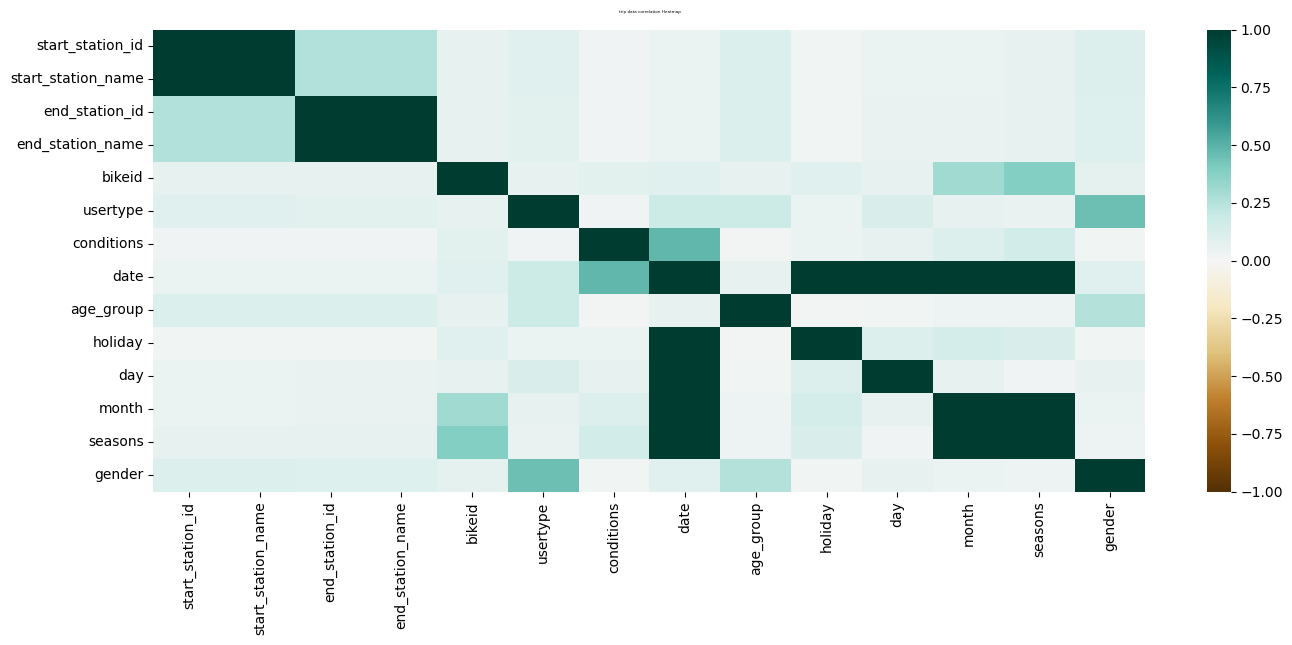

In [64]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cat_corr,vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('trip data correlation Heatmap', fontdict={'fontsize':3}, pad=12);

In [65]:
# corr = df.corr(method='pearson')
cat_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [66]:
df.var()

index               1.067409e+10
tripduration        1.070881e+01
start_lat           4.934385e-05
start_lon           1.108452e-04
end_lat             4.582686e-05
end_lon             1.098892e-04
hour                2.725486e+01
min                 2.983921e+02
temp                8.529681e+01
feelslike           1.162003e+02
dew                 9.695241e+01
humidity            3.100430e+02
precip              2.785967e+01
precipprob          1.083245e+03
snow                2.856748e-04
snowdepth           8.711030e-02
windspeed           6.671482e+00
winddir             1.277324e+04
sealevelpressure    5.109405e+01
cloudcover          1.954648e+03
visibility          4.858425e-01
solarradiation      5.862139e+04
uvindex             6.015491e+00
dist                2.103176e-01
birthyear           9.285314e+01
years_old           9.285314e+01
dtype: float64

In [67]:
abs(df.corr()['tripduration'])

index               0.000794
tripduration        1.000000
start_lat           0.144508
start_lon           0.167187
end_lat             0.082219
end_lon             0.123996
hour                0.042644
min                 0.005910
temp                0.094772
feelslike           0.093547
dew                 0.069967
humidity            0.029003
precip              0.002590
precipprob          0.008824
snow                0.003681
snowdepth           0.002124
windspeed           0.014997
winddir             0.012860
sealevelpressure    0.004109
cloudcover          0.017426
visibility          0.012398
solarradiation      0.080664
uvindex             0.080757
dist                0.694444
birthyear           0.008296
years_old           0.008296
Name: tripduration, dtype: float64

#### comments on feature 

1. with respect to avearge temperature 
    * tempmin
	* tempmax
	* dew 
	* solarradiation
	* humidity  
has postive correaltion on the other hand 
	* windspeed
	* snowdepth
	* snow
has the negitive correaltion


2. with respect to dist travelled  
    * start station lat 
	* end station lat
	* birth year 
has postive correaltion on the other hand 
	* start station lan
	* end station lan
has the negitive correaltion

3. with respect to tripduration
	* usertype 
	* gender
has the negitive correaltion	


### Some important time series garphs 

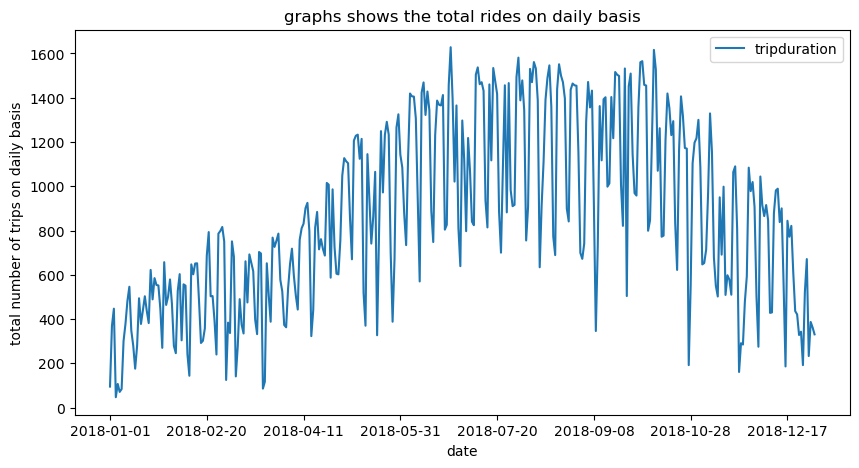

In [68]:
df = selected_df.groupby(['date'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='date', y='tripduration',figsize=(10,5),title='graphs shows the total rides on daily basis')
ax.set(xlabel='date', ylabel='total number of trips on daily basis')
plt.show()

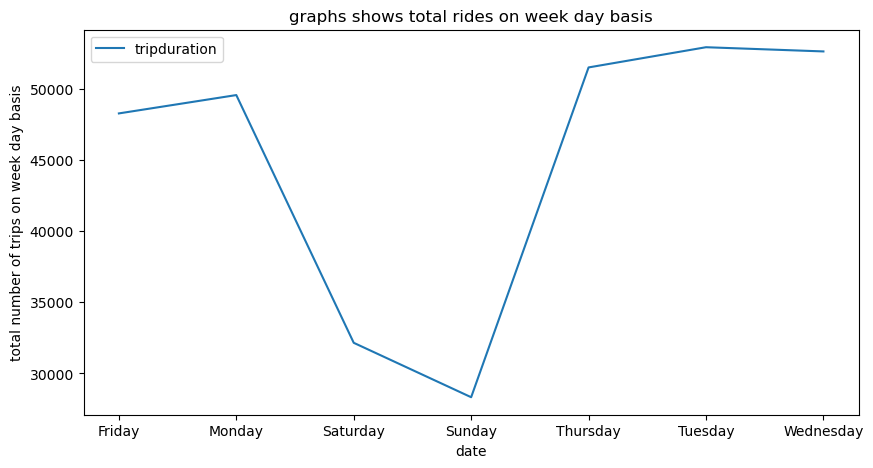

In [69]:
df = selected_df.groupby(['day'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='day', y='tripduration',figsize=(10,5),title='graphs shows total rides on week day basis')
ax.set(xlabel='date', ylabel='total number of trips on week day basis')
plt.show()

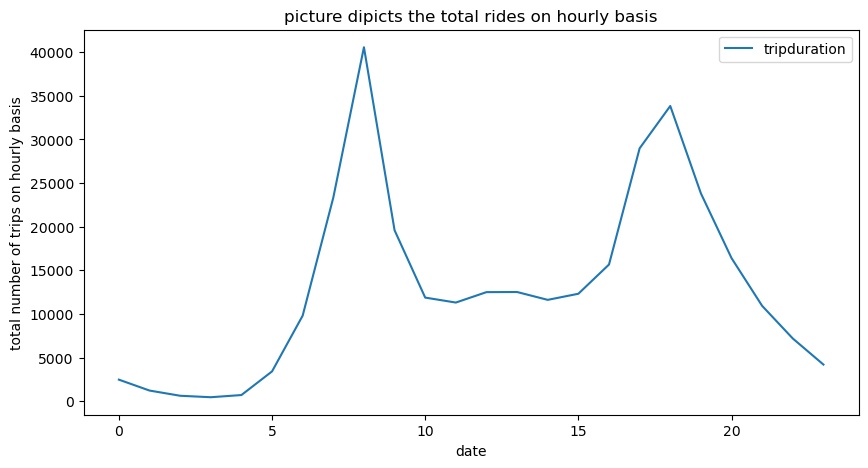

In [70]:
df = selected_df.groupby(['hour'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='hour', y='tripduration',figsize=(10,5),title='picture dipicts the total rides on hourly basis')
ax.set(xlabel='date', ylabel='total number of trips on hourly basis')
plt.show()

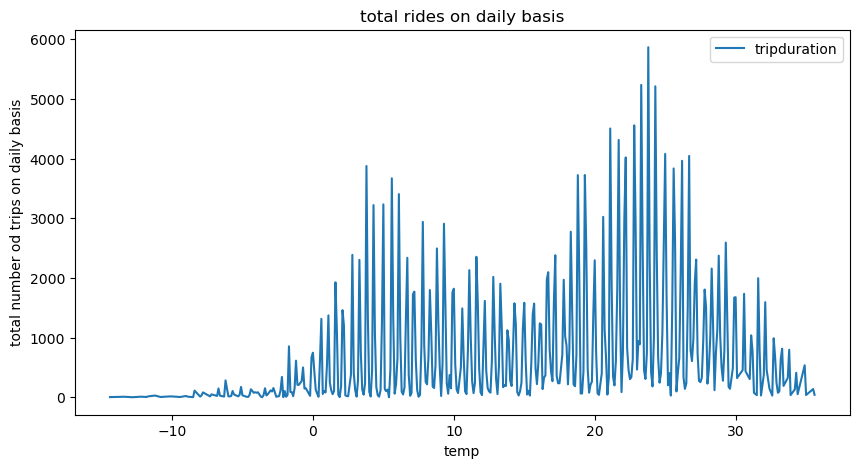

In [71]:
df = selected_df.groupby(['temp'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='temp', y='tripduration',figsize=(10,5),title='total rides on daily basis')
ax.set(xlabel='temp', ylabel='total number od trips on daily basis')
plt.show()

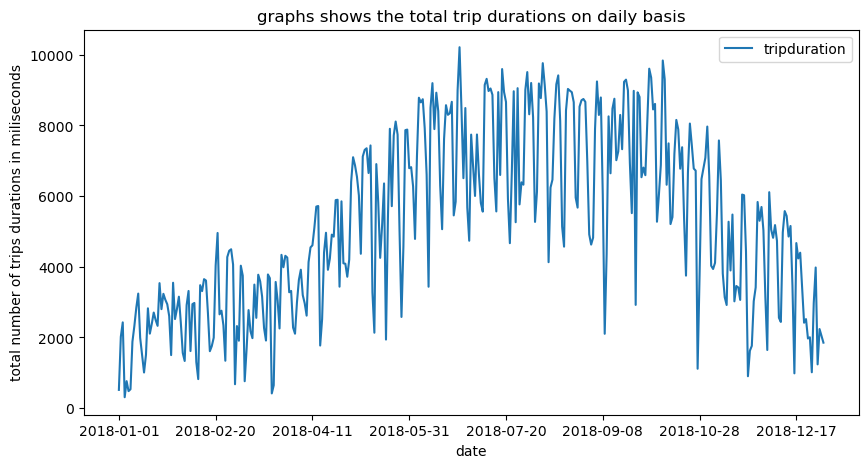

In [72]:
df = selected_df.groupby(['date'])['tripduration'].agg('sum').reset_index()
ax = df.plot(x='date', y='tripduration',figsize=(10,5),title='graphs shows the total trip durations on daily basis')
ax.set(xlabel='date', ylabel='total number of trips durations in miliseconds')
plt.show()


### Numerical values distplots

In [73]:
#assign the numerical coulmn to variavle
numerical_columns=list(selected_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['index', 'tripduration', 'start_lat', 'start_lon', 'end_lat', 'end_lon',
       'hour', 'min', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex', 'dist', 'birthyear', 'years_old'],
      dtype='object')

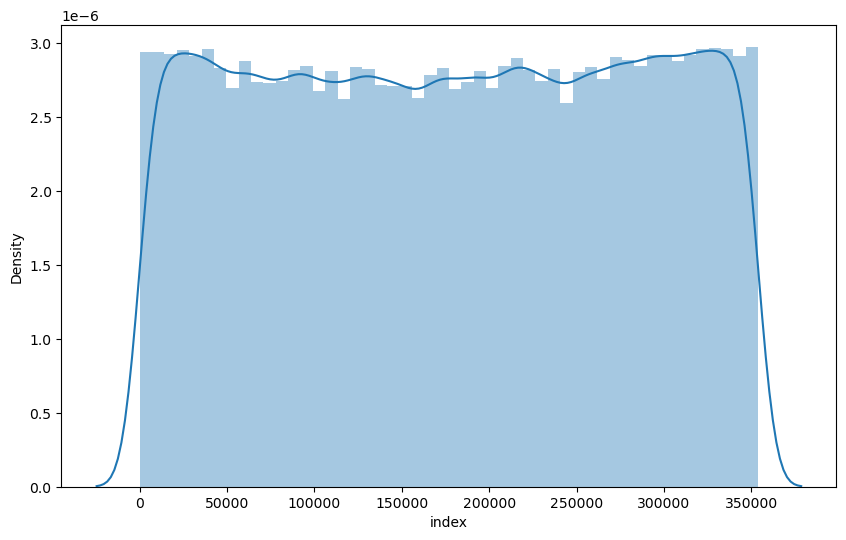

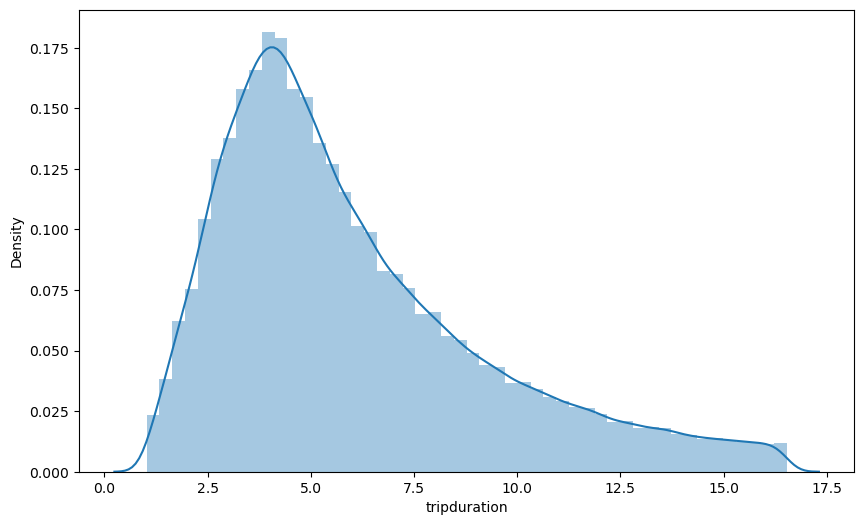

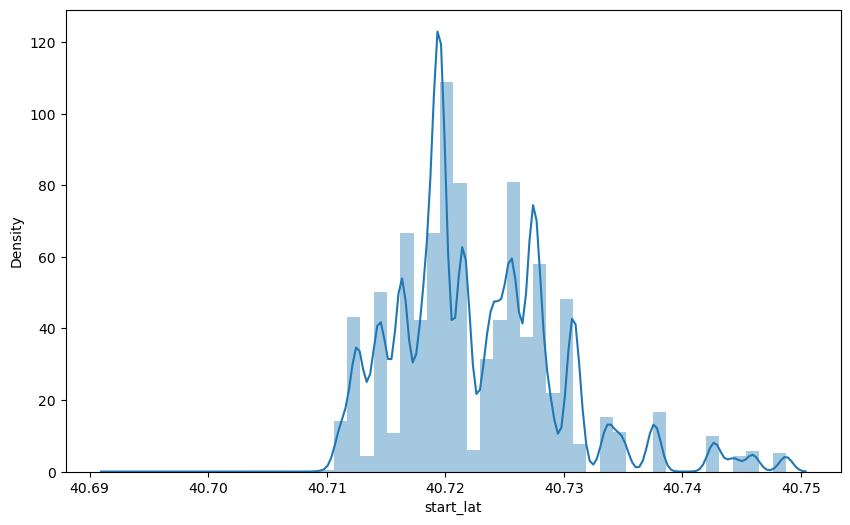

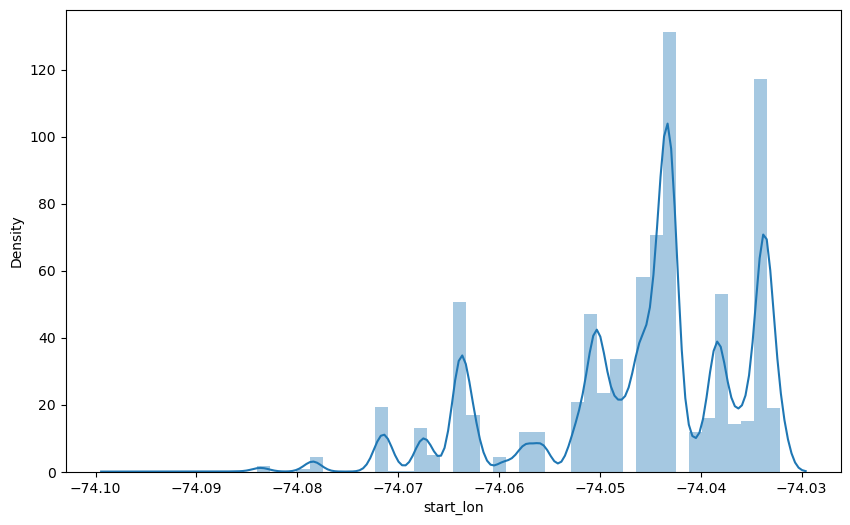

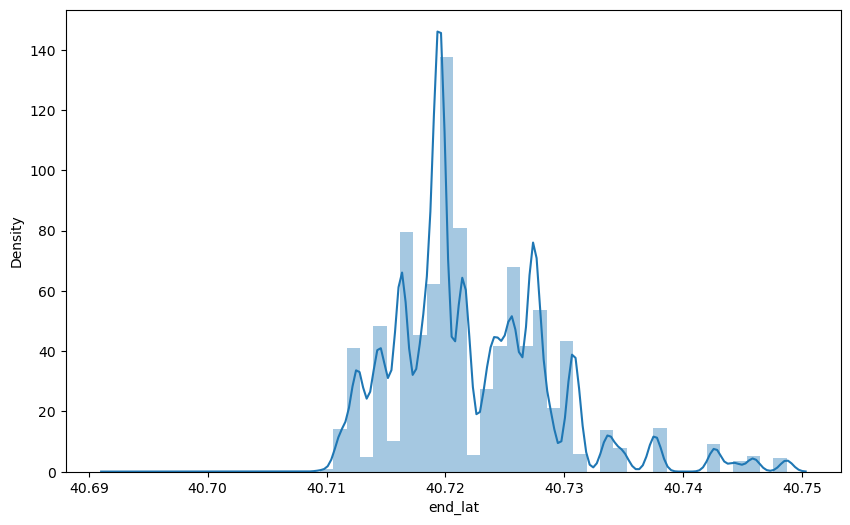

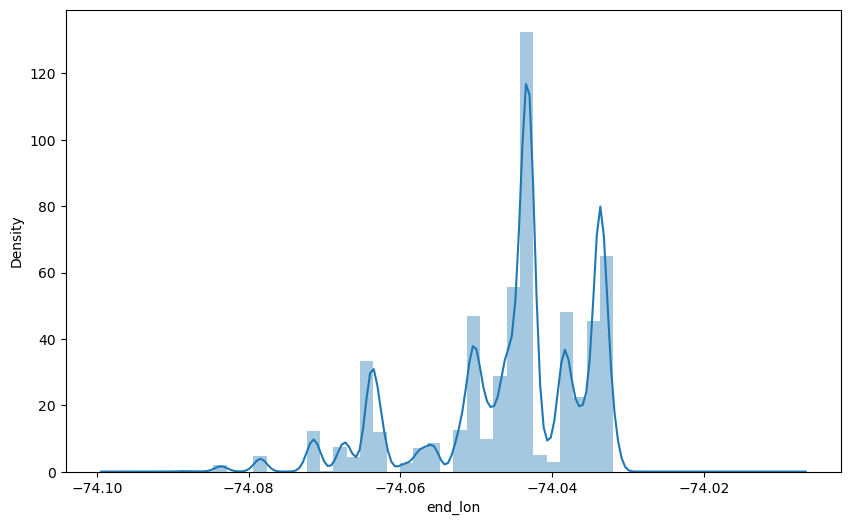

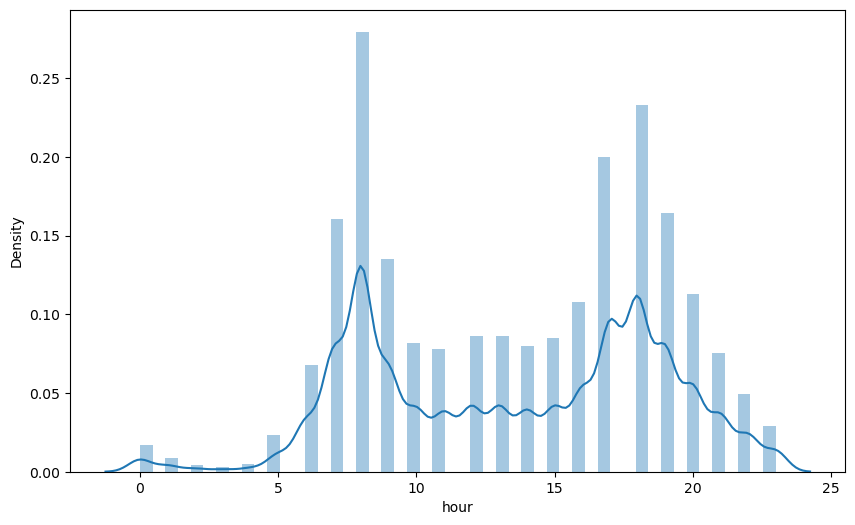

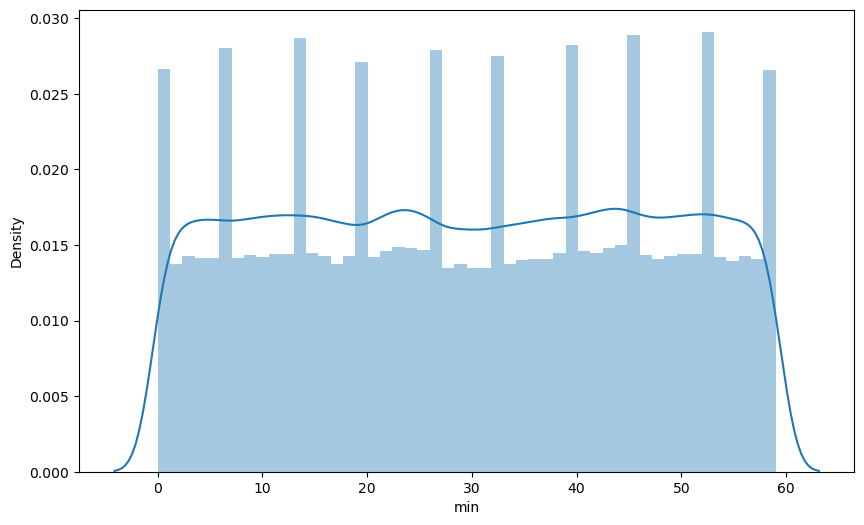

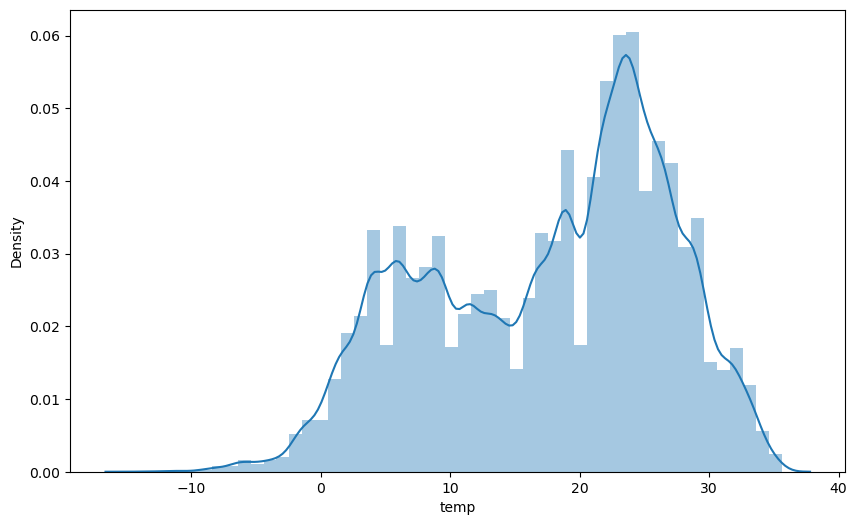

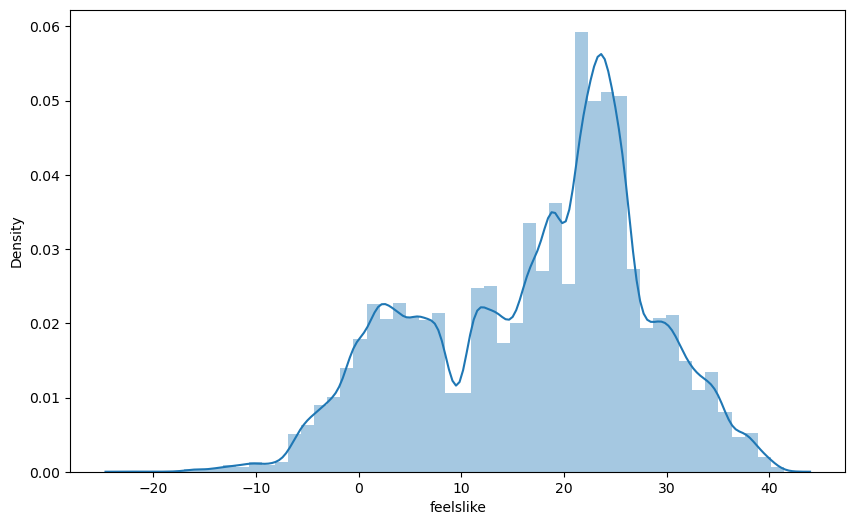

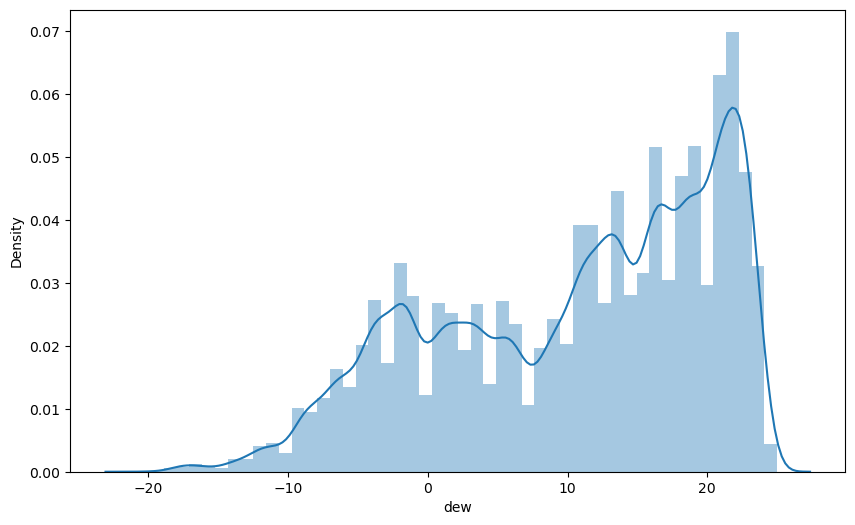

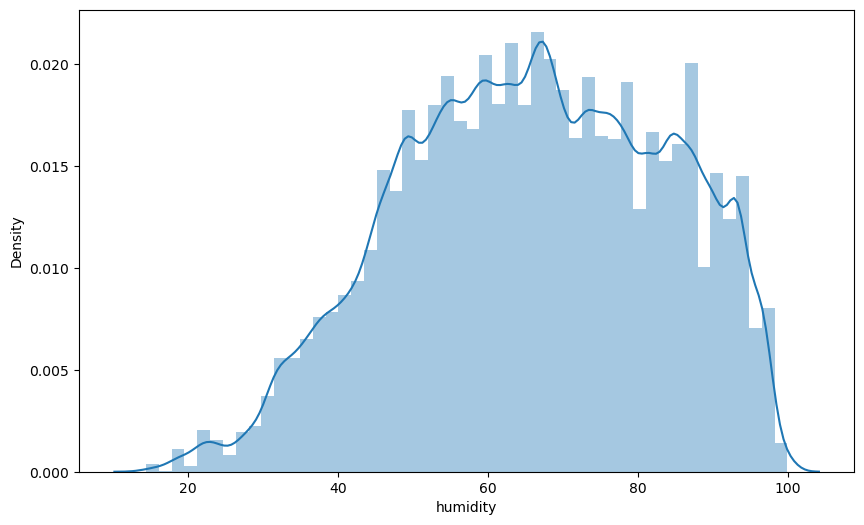

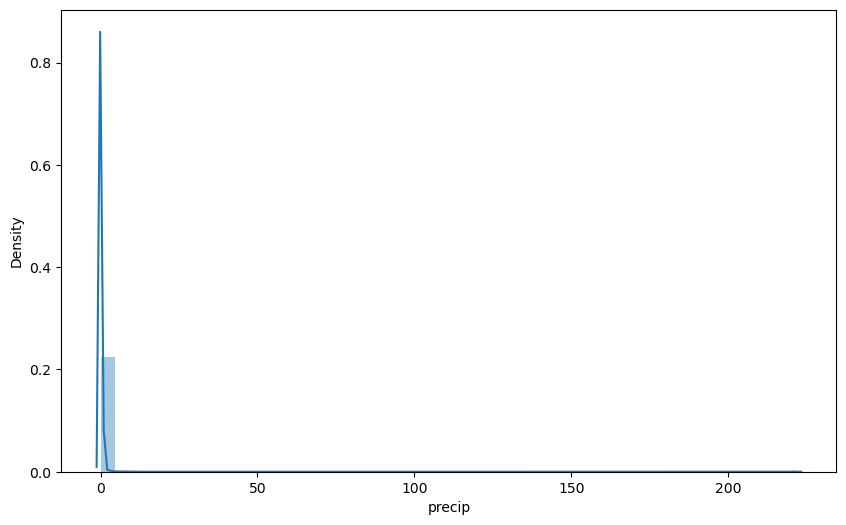

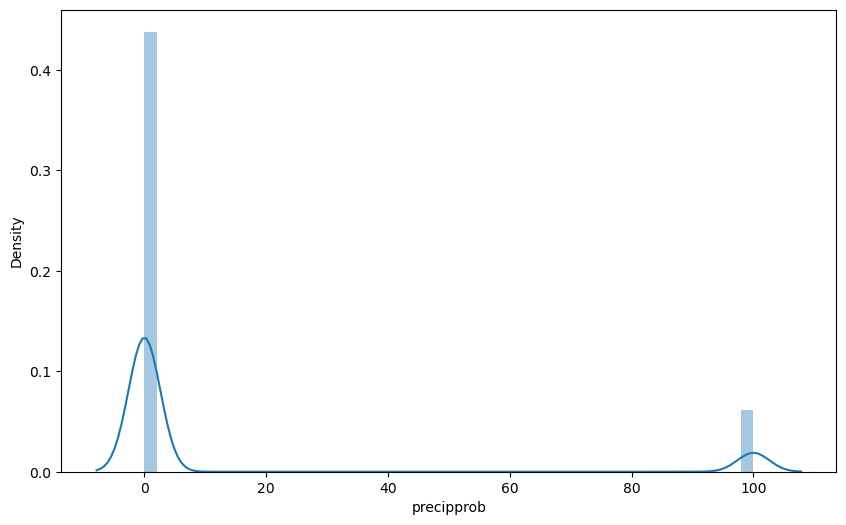

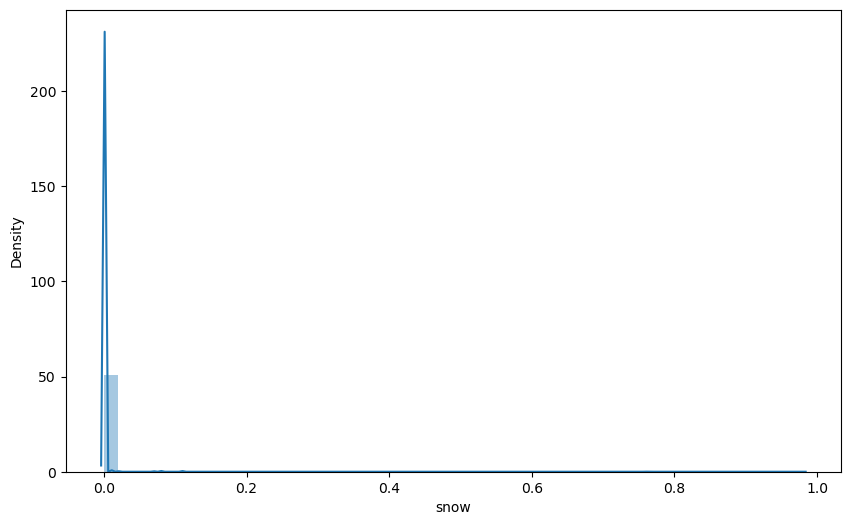

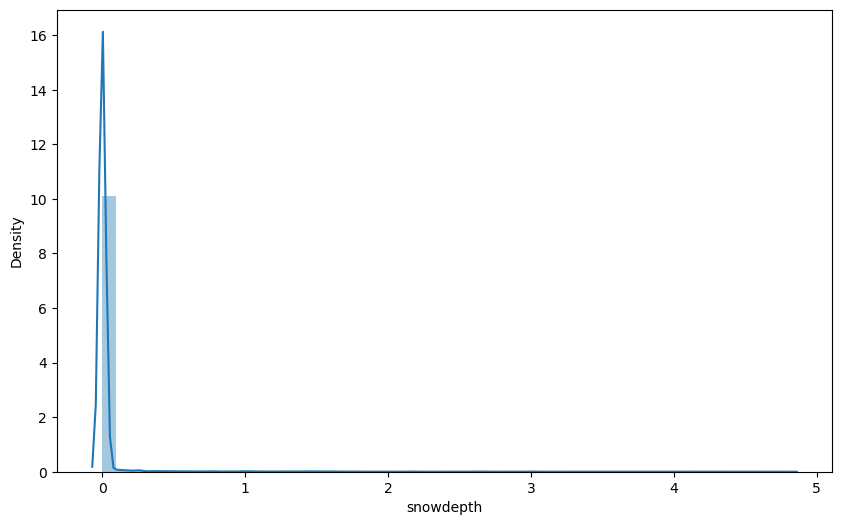

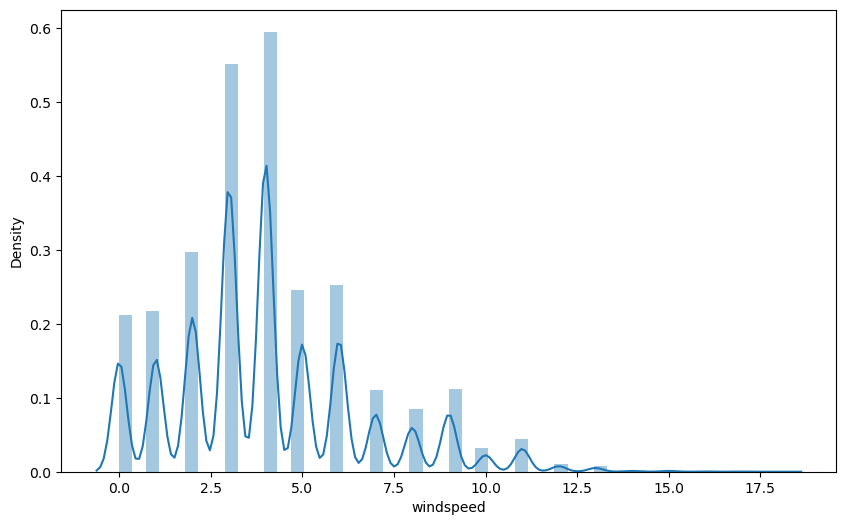

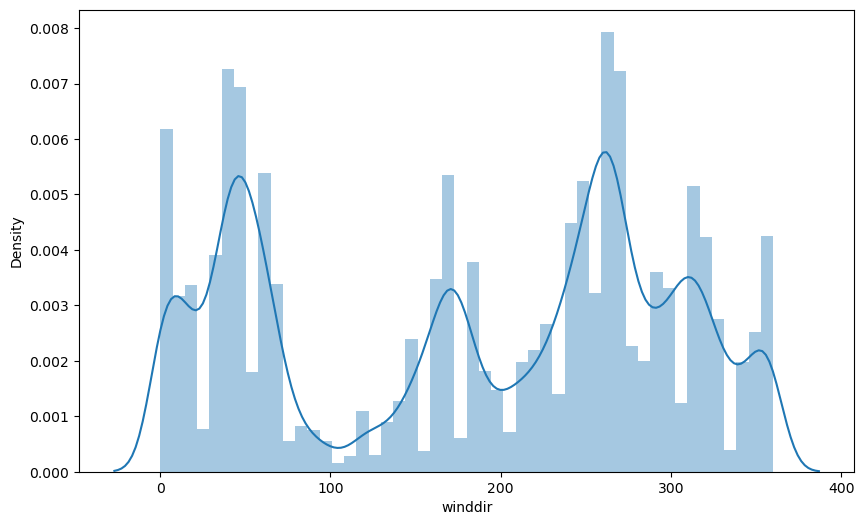

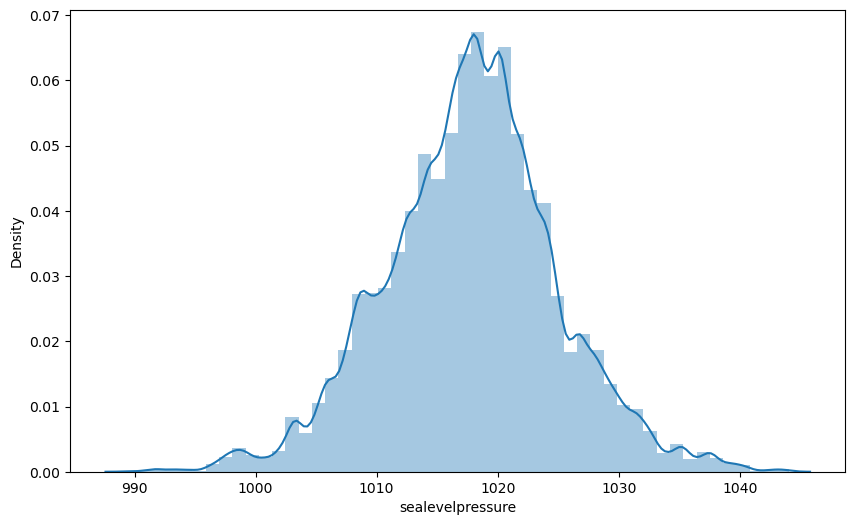

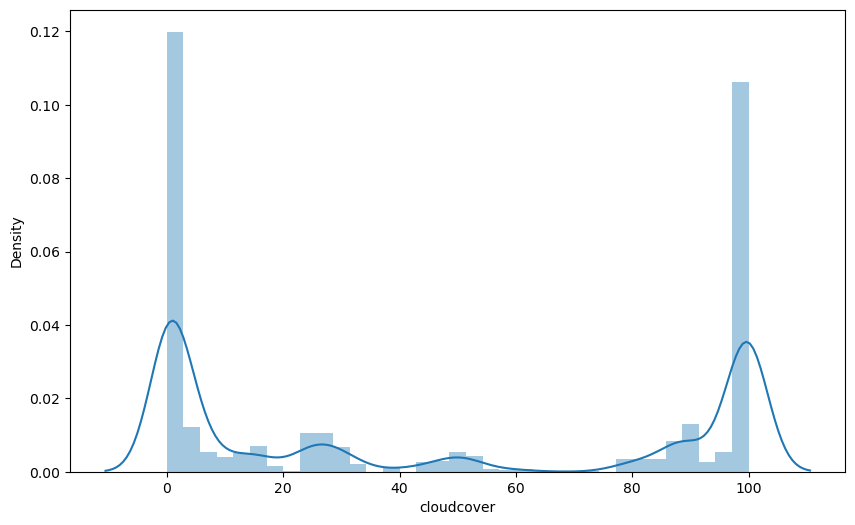

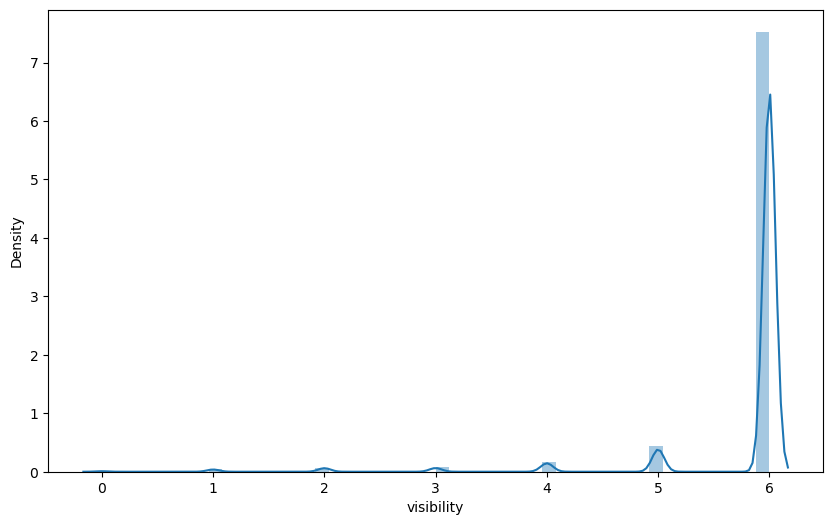

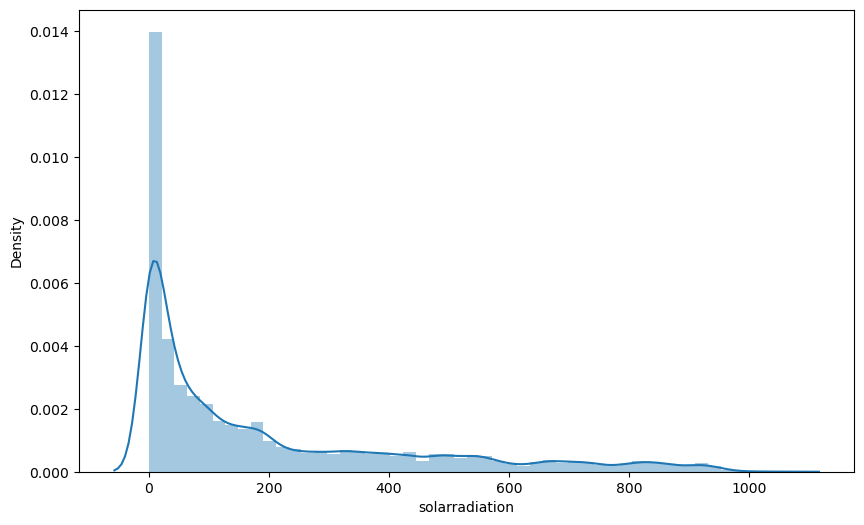

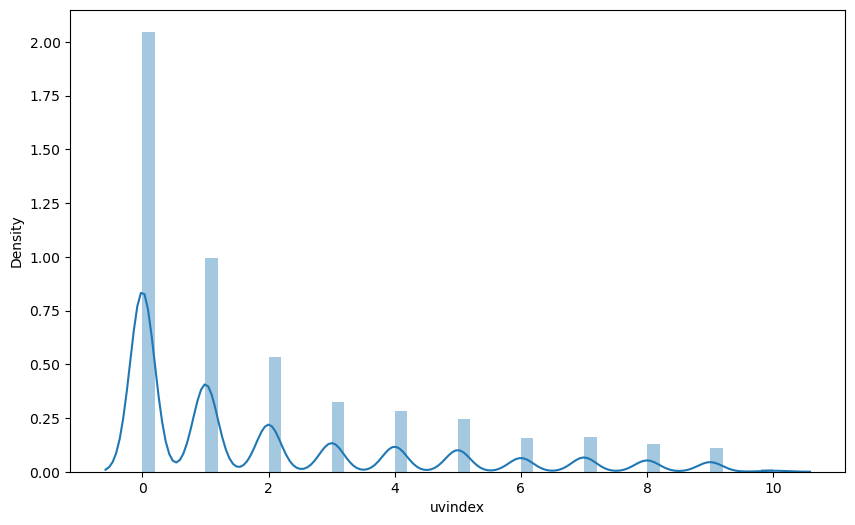

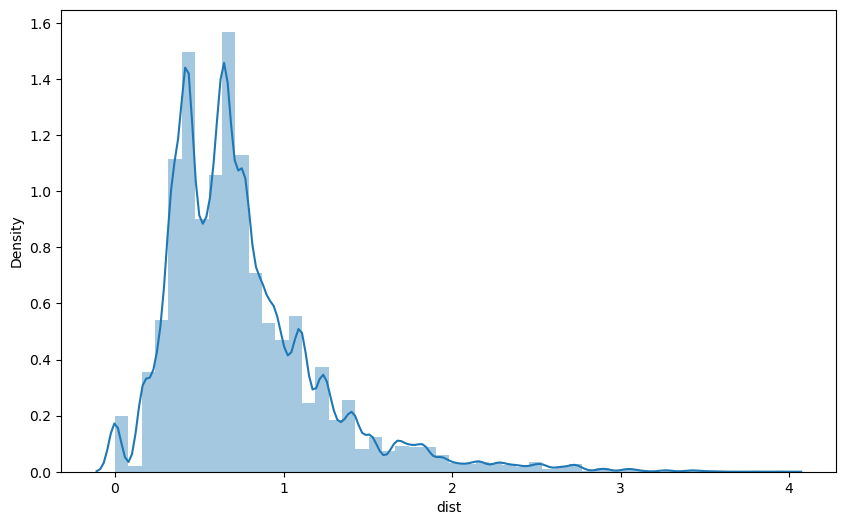

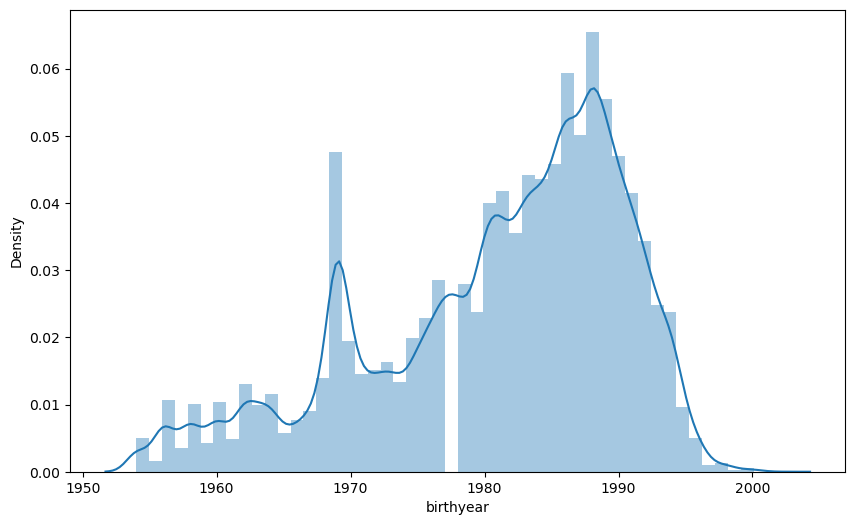

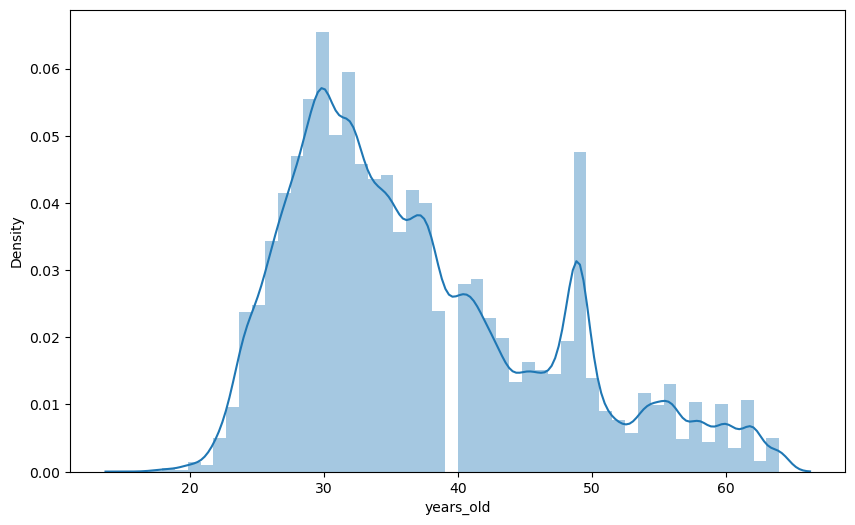

In [75]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
    plt.figure(figsize=(10,6))
    sns.distplot(x=selected_df[col])
    plt.xlabel(col)
plt.show()

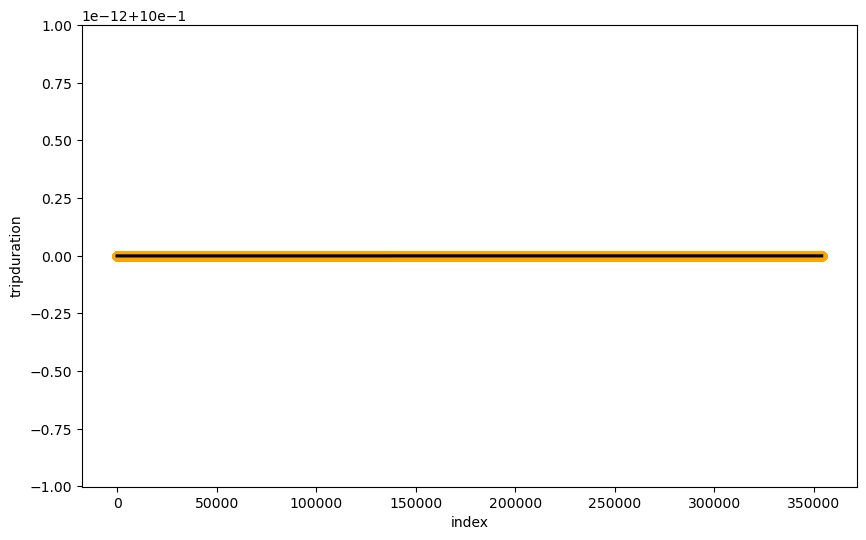

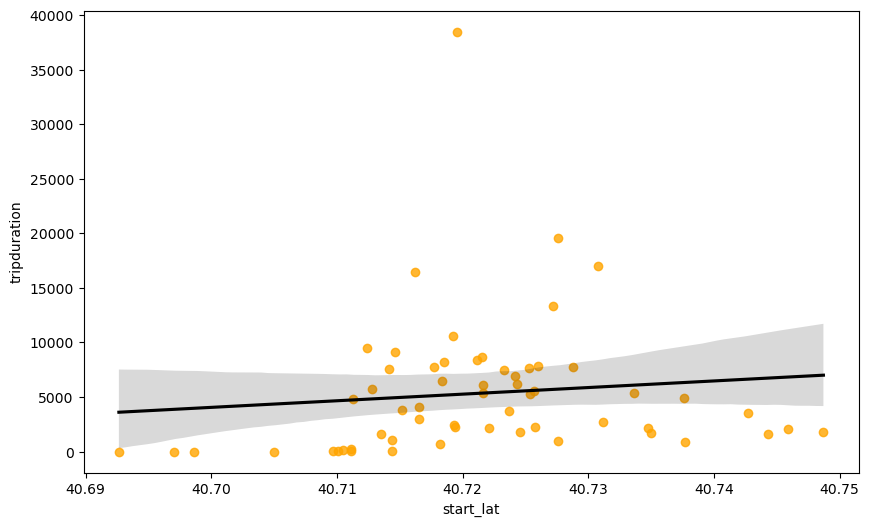

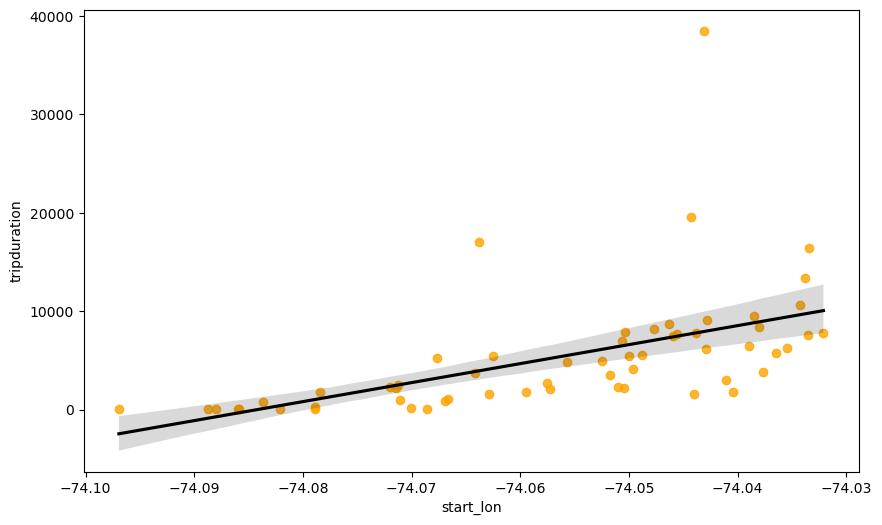

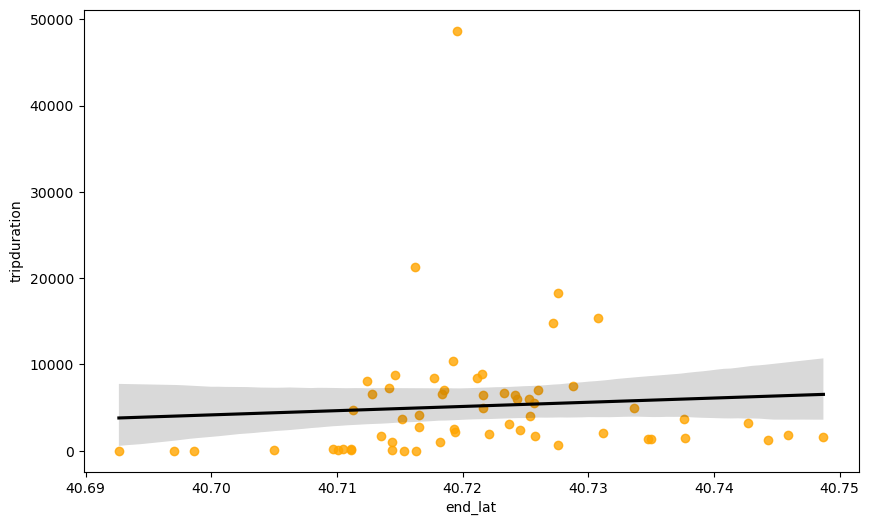

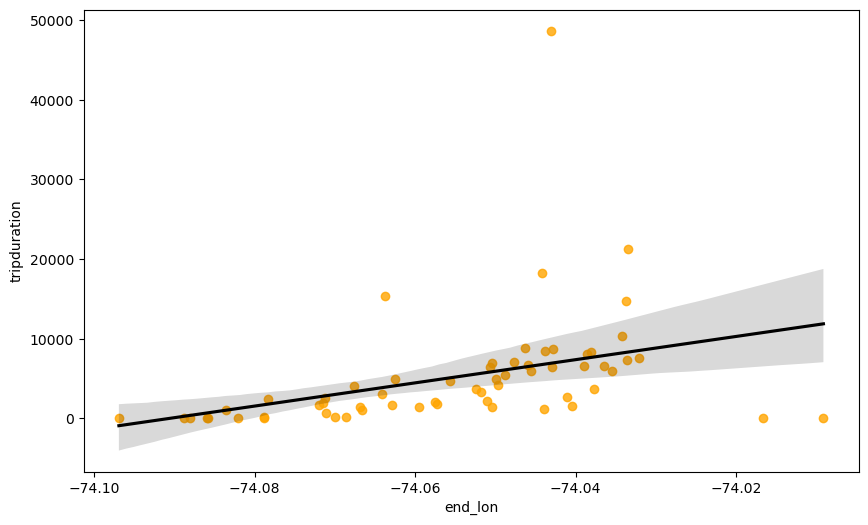

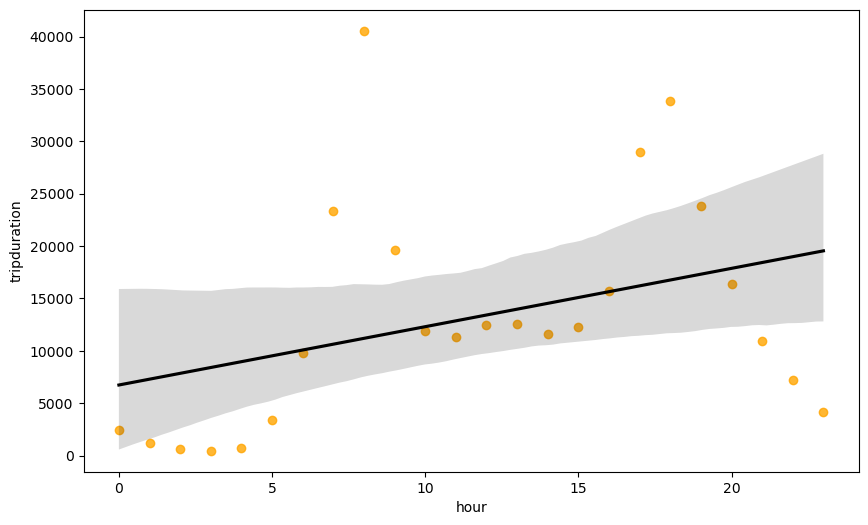

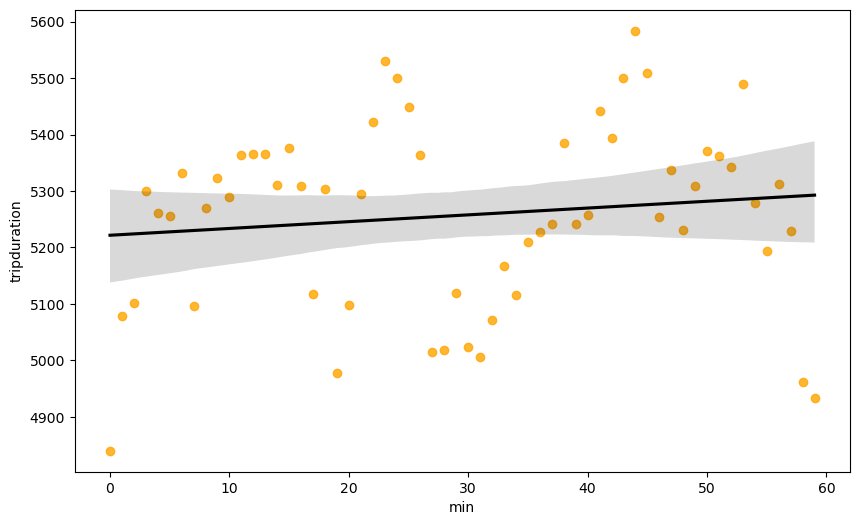

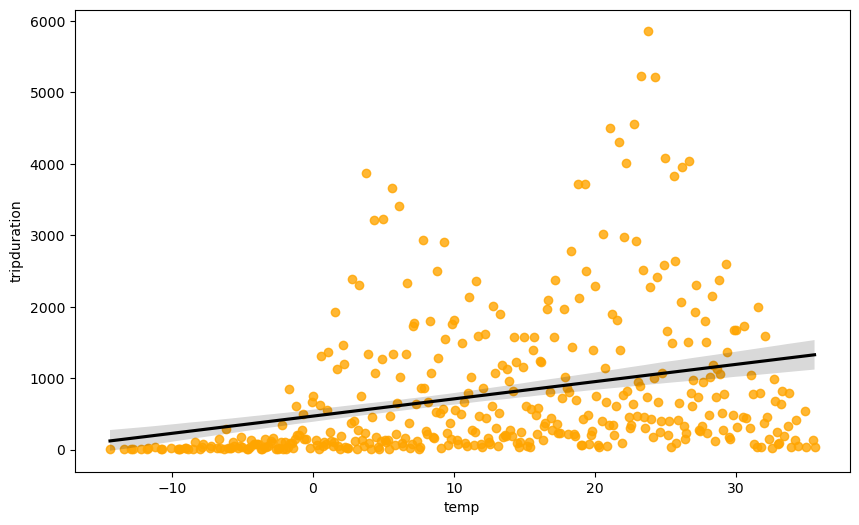

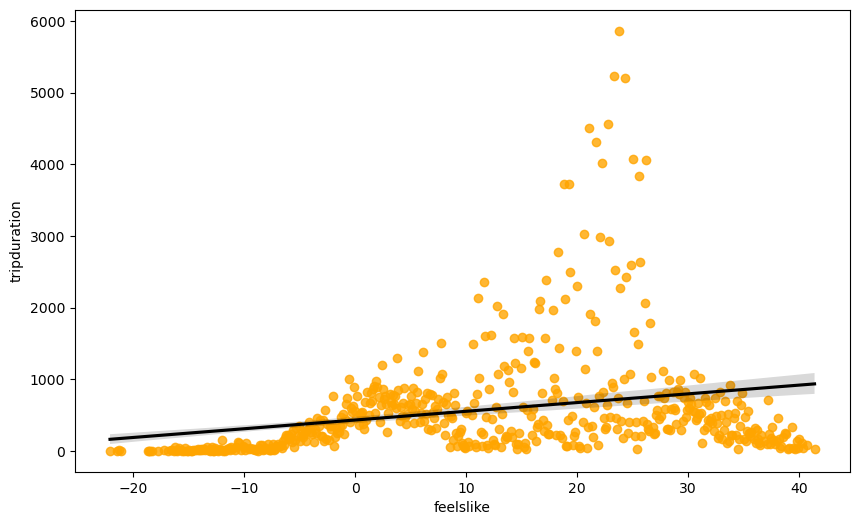

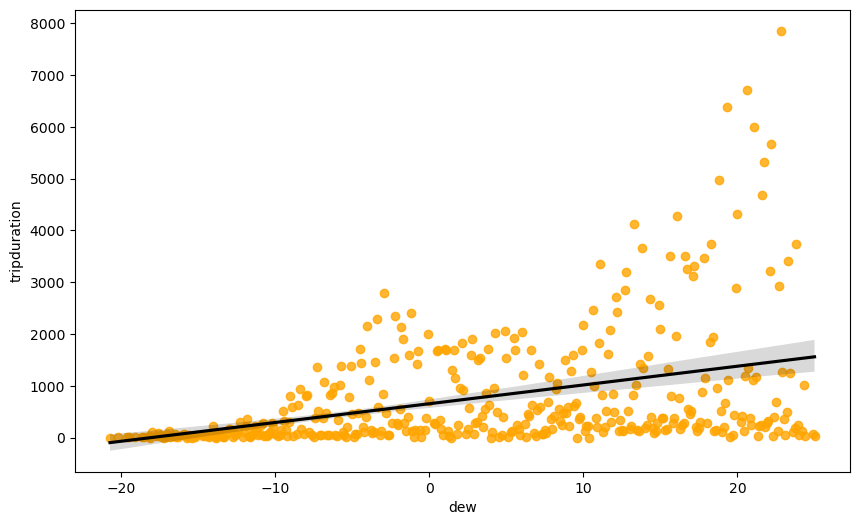

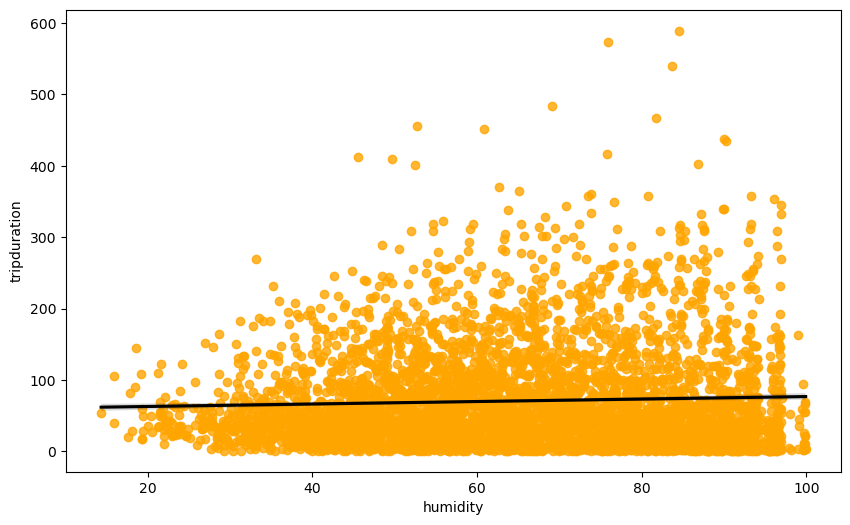

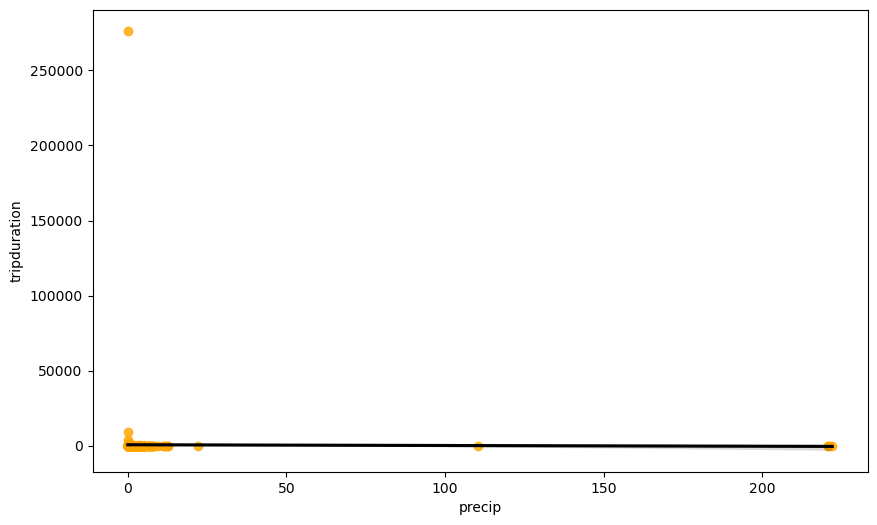

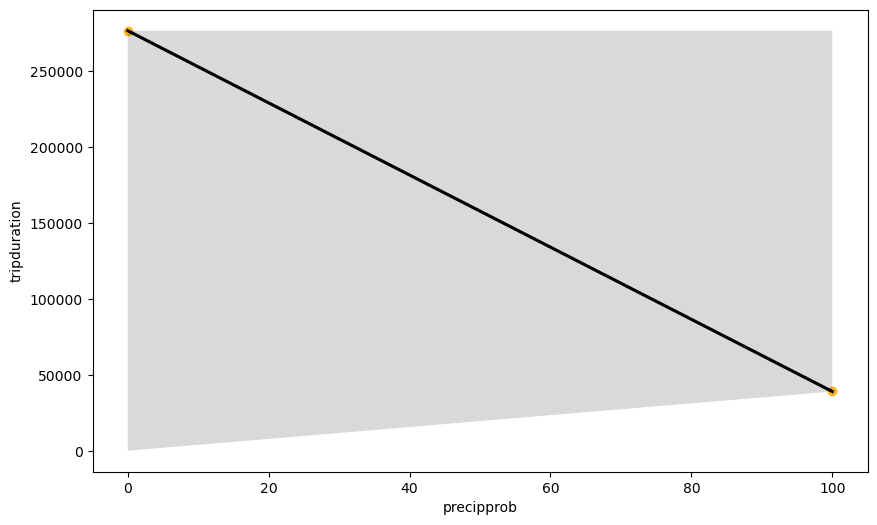

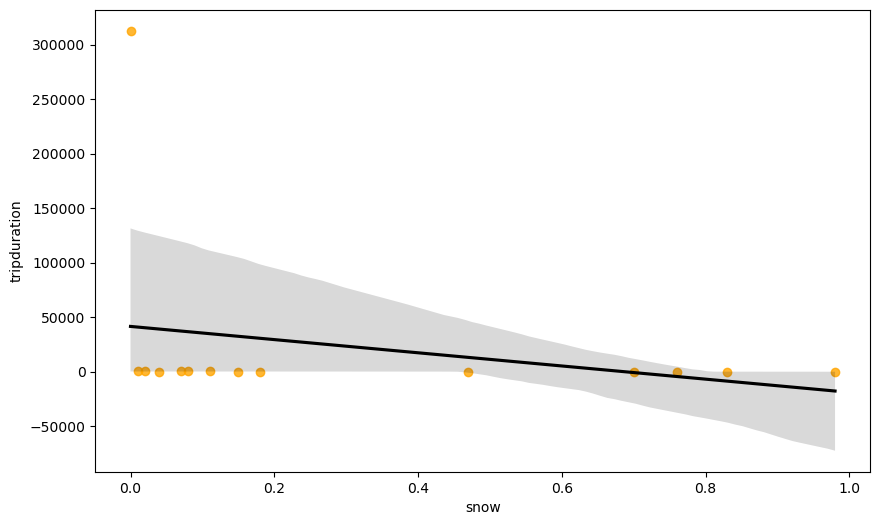

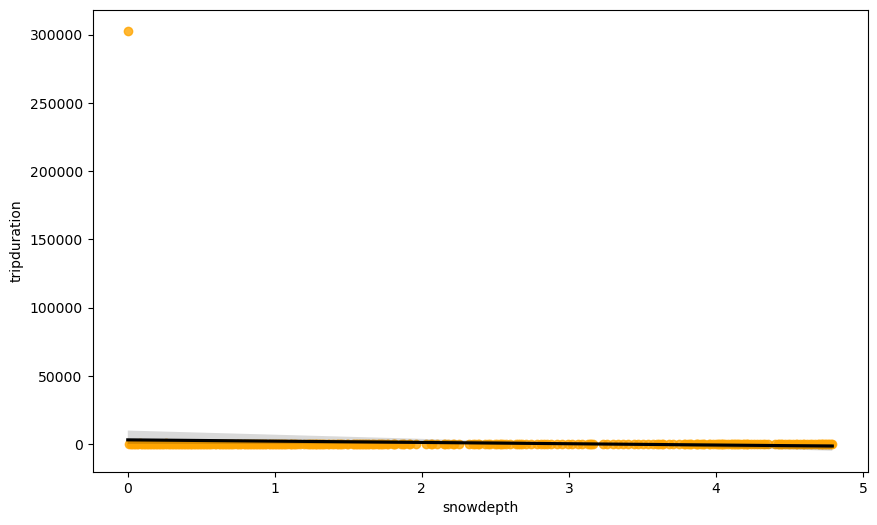

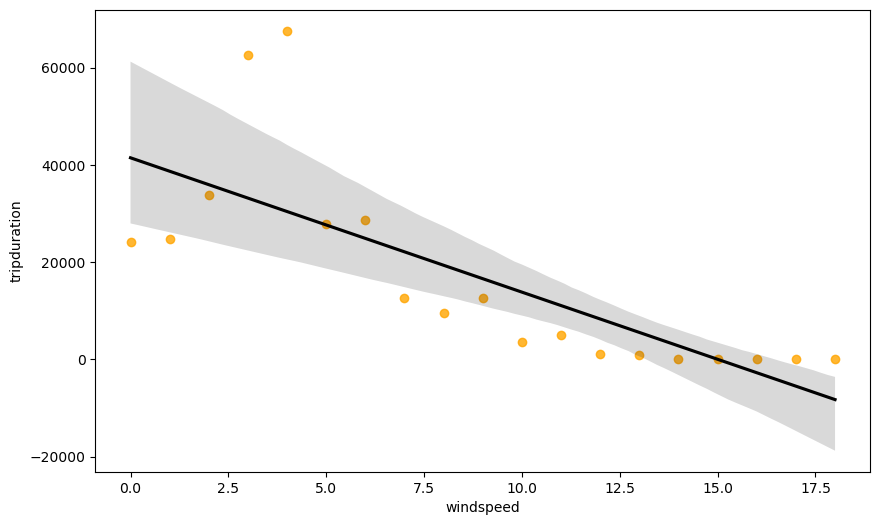

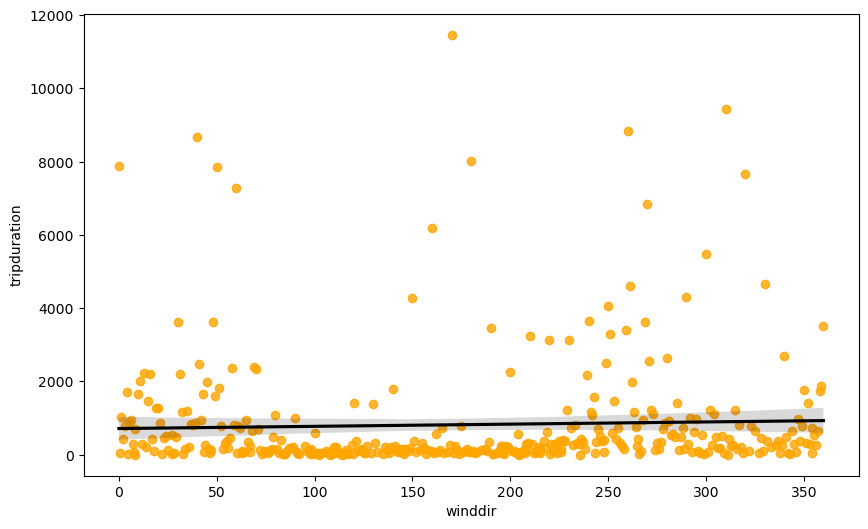

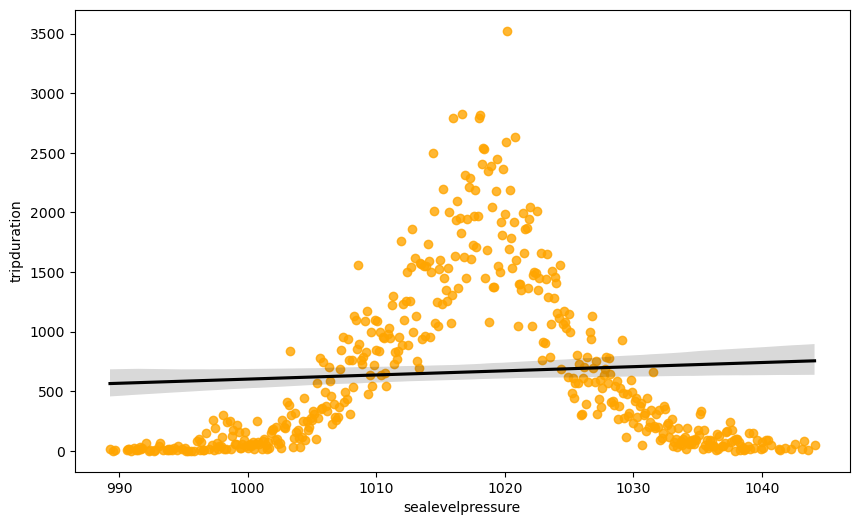

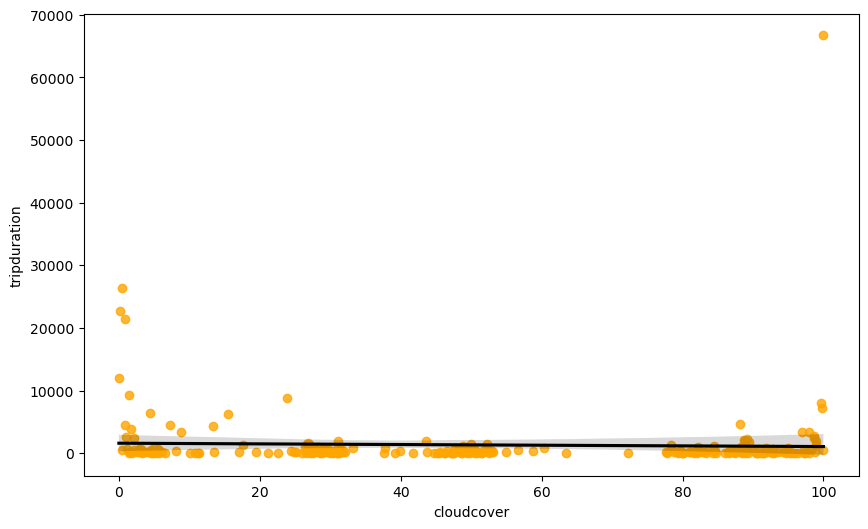

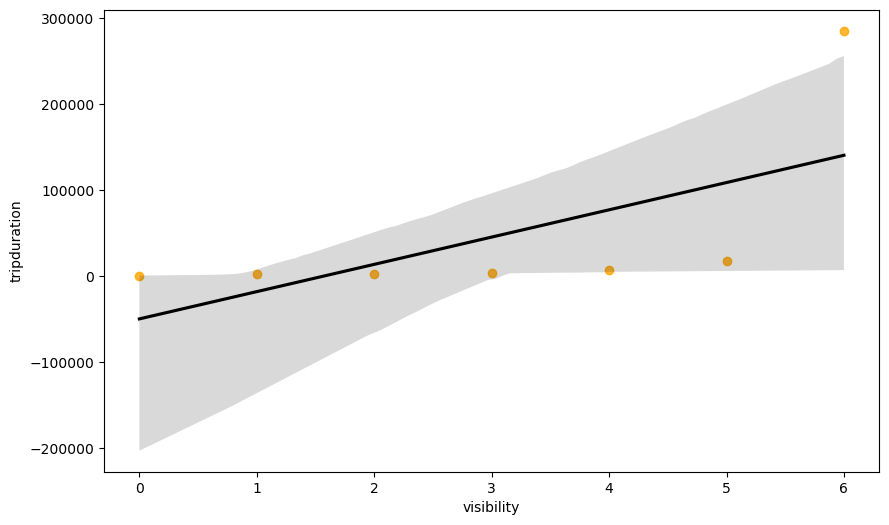

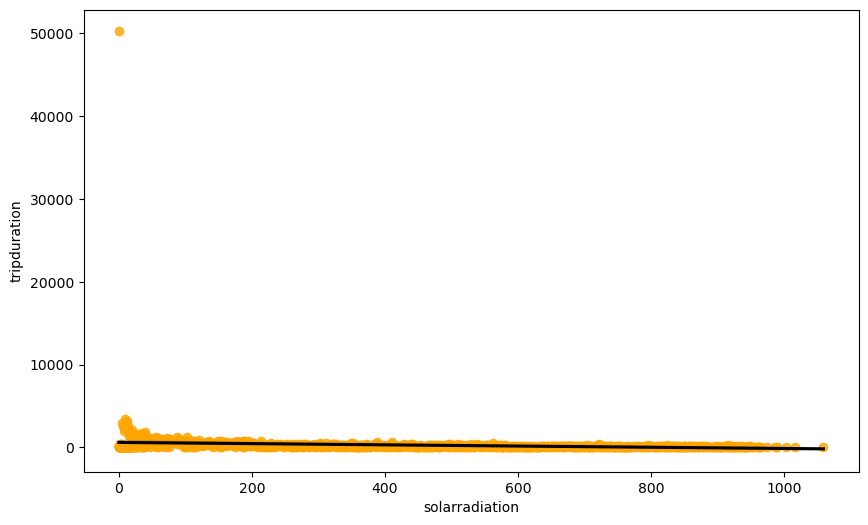

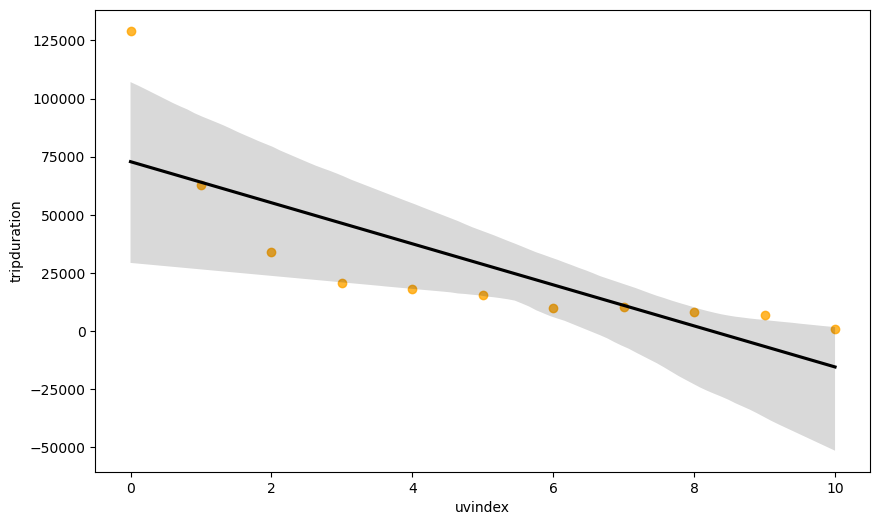

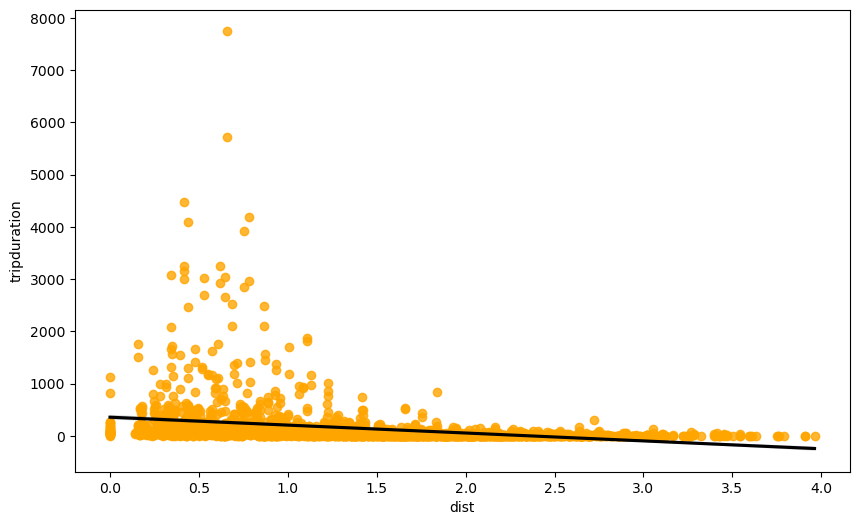

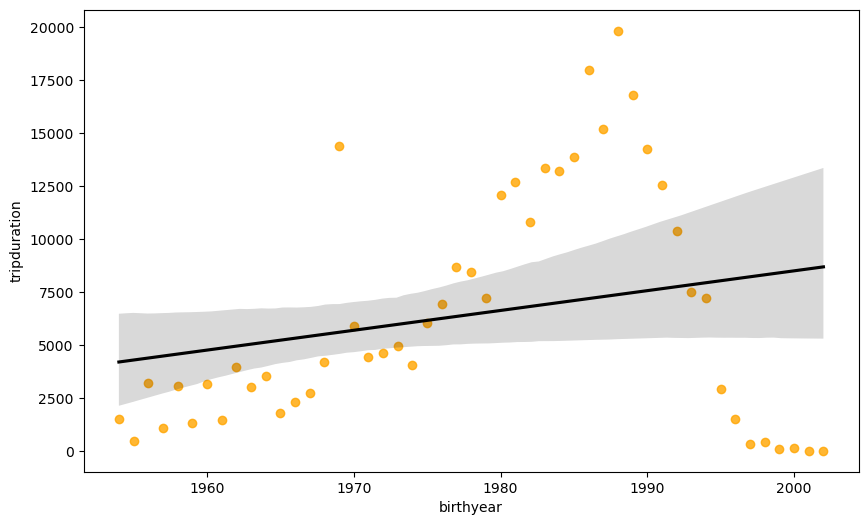

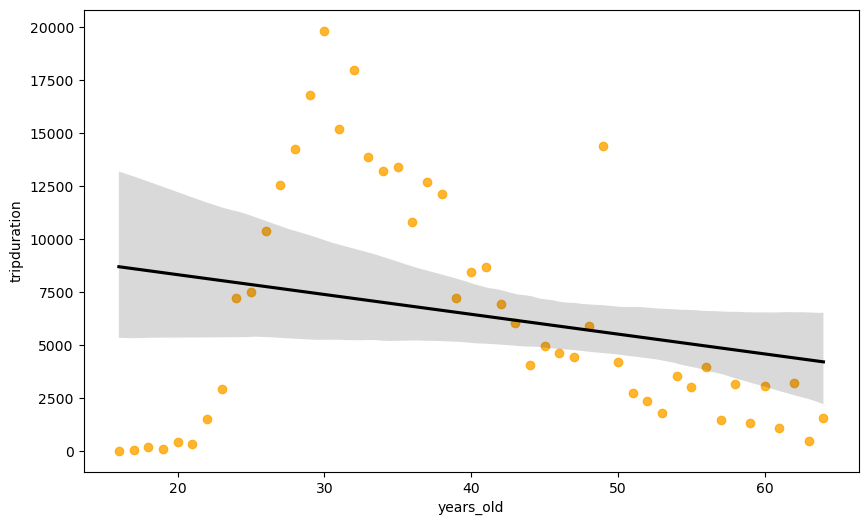

In [76]:
for col in numerical_features:
    if col != 'tripduration':
        fig,ax=plt.subplots(figsize=(10,6))
        df = selected_df.groupby(col)['tripduration'].agg('count').reset_index()
        sns.regplot(x=df[col],y=df['tripduration'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

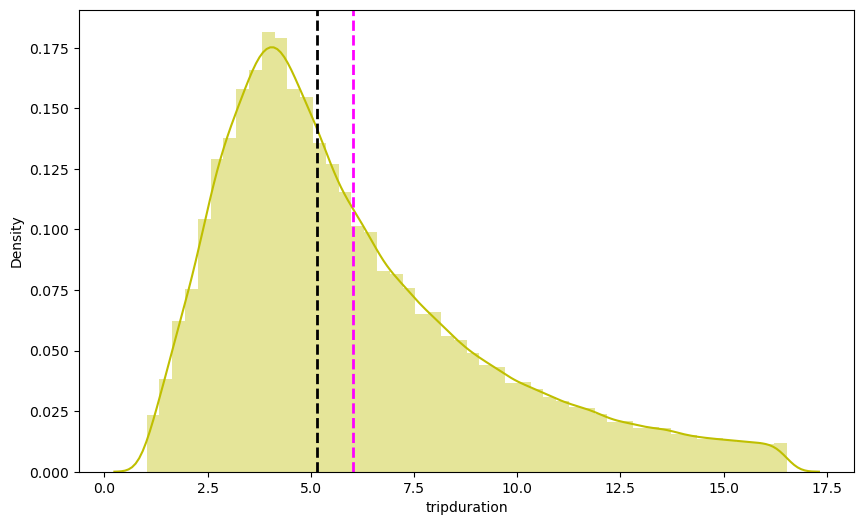

In [77]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('tripduration')
plt.ylabel('Density')
ax=sns.distplot(selected_df['tripduration'],hist=True ,color="y")
ax.axvline(selected_df['tripduration'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(selected_df['tripduration'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

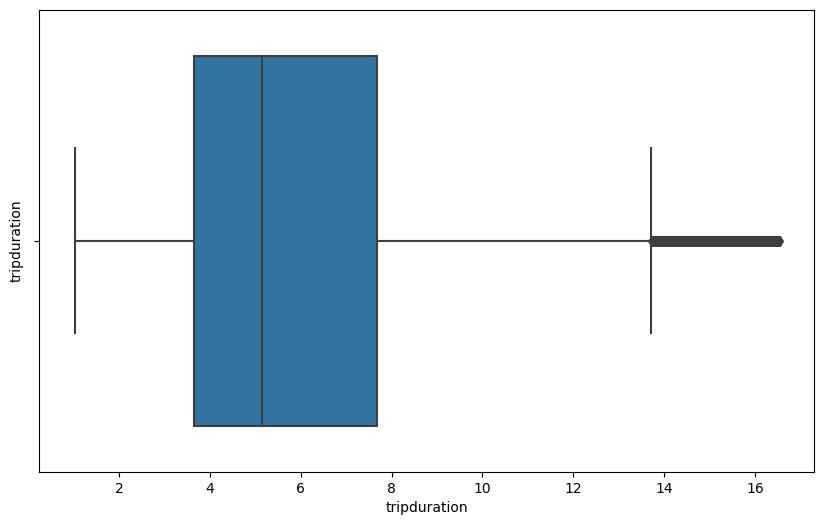

In [78]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('tripduration')
sns.boxplot(x=selected_df['tripduration'])
plt.show()

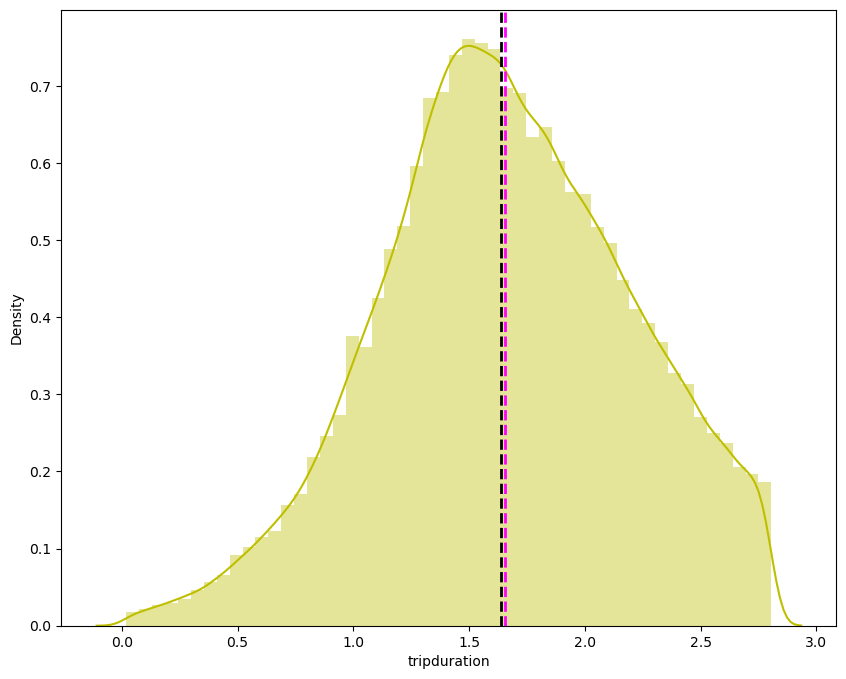

In [79]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('tripduration')
plt.ylabel('Density')

ax=sns.distplot(np.log(selected_df['tripduration']), color="y")
ax.axvline(np.log(selected_df['tripduration']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.log(selected_df['tripduration']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

[Text(0.5, 1.0, 'Theoritical quantiles')]

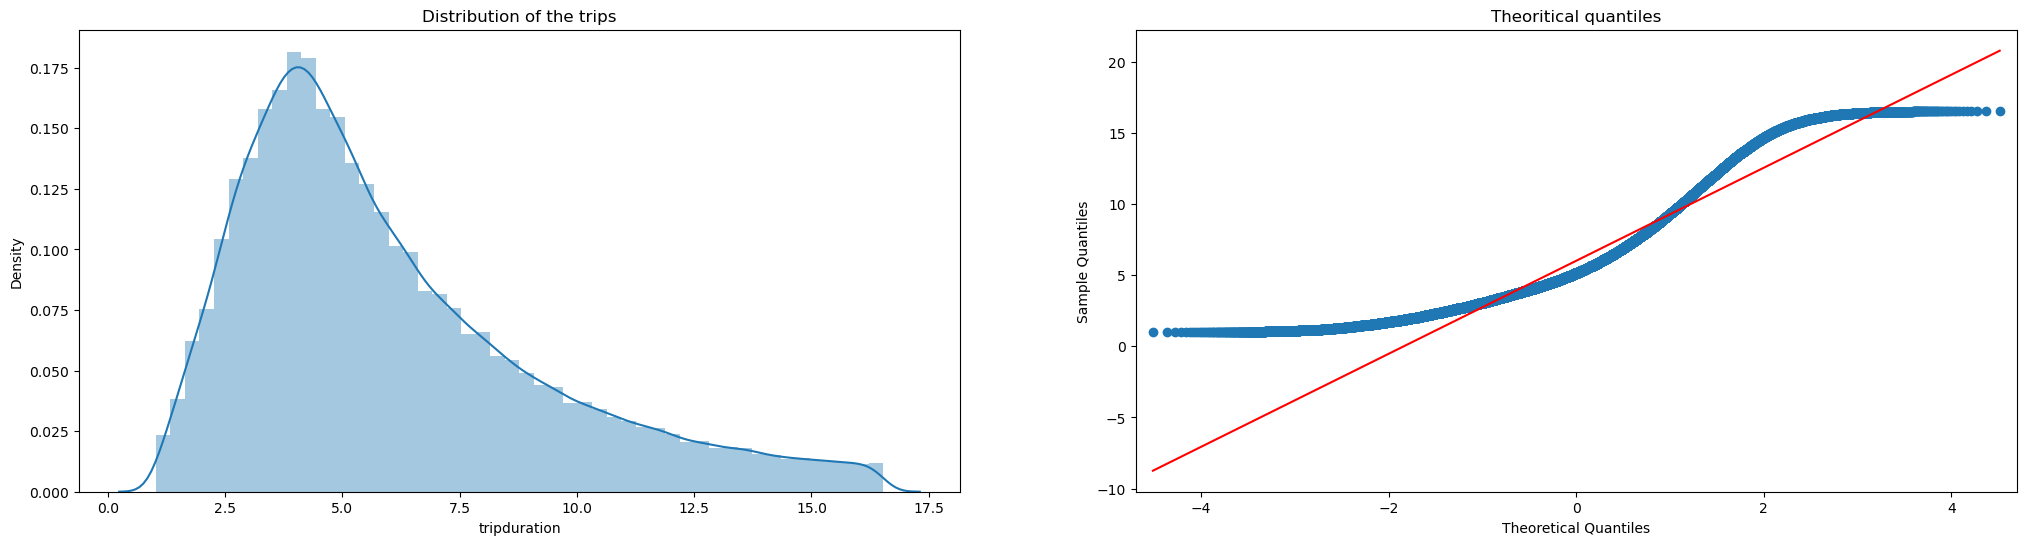

In [80]:
## before applying log
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(25,6))
sns.distplot(selected_df['tripduration'], ax=ax1)
ax1.set(title='Distribution of the trips')
qqplot(selected_df['tripduration'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

[Text(0.5, 1.0, 'Theoritical quantiles')]

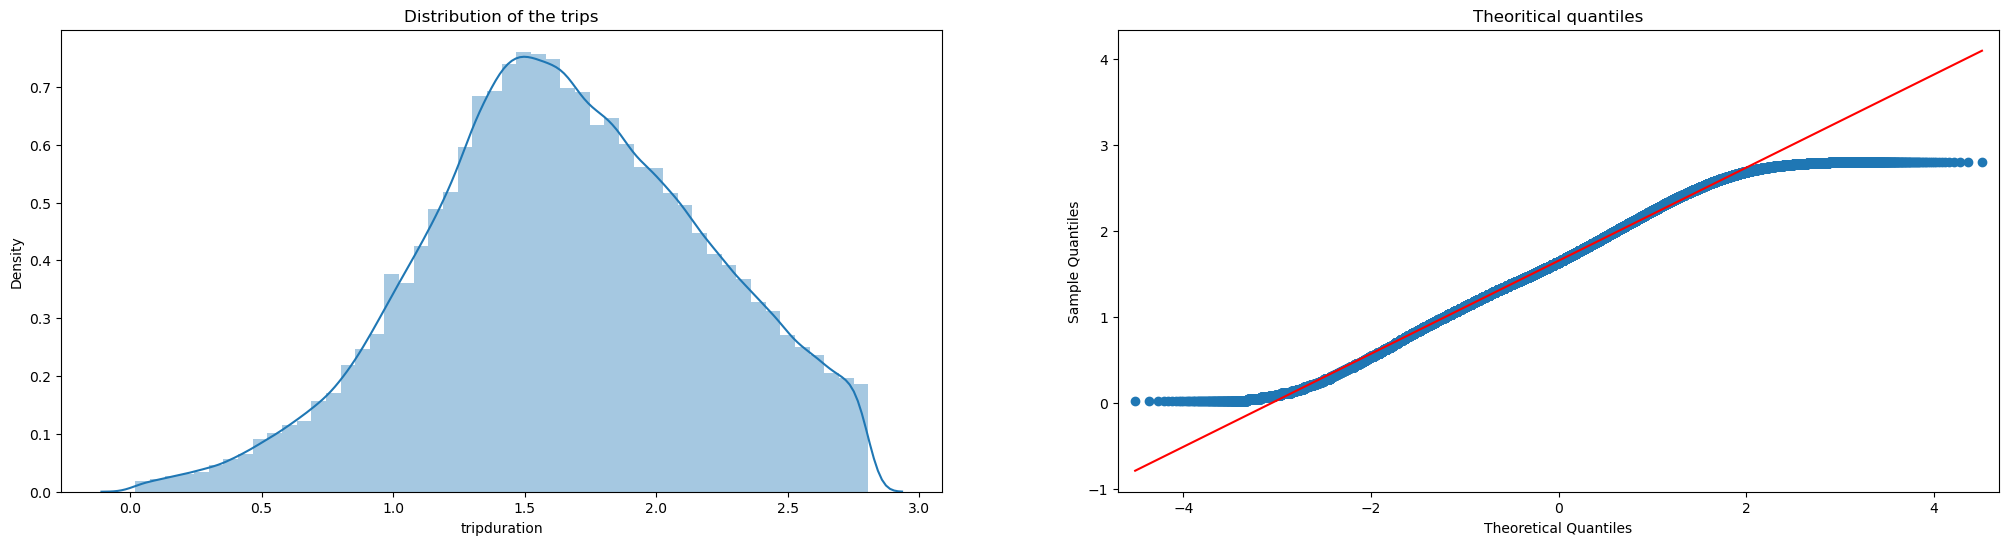

In [81]:
## after applying log
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(25,6))
sns.distplot(np.log(selected_df['tripduration']), ax=ax1)
ax1.set(title='Distribution of the trips')
qqplot(np.log(selected_df['tripduration']), ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')


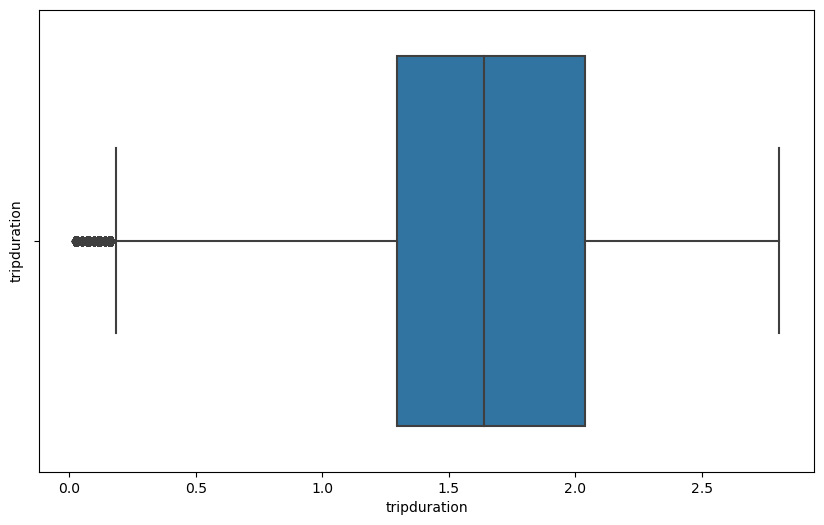

In [82]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('tripduration')
sns.boxplot(x=np.log(selected_df['tripduration']))
plt.show()

In [50]:
df = selected_df.copy()

In [51]:
df.columns

Index(['index', 'tripduration', 'start_station_id', 'start_station_name',
       'start_lat', 'start_lon', 'end_station_id', 'end_station_name',
       'end_lat', 'end_lon', 'bikeid', 'usertype', 'hour', 'min', 'temp',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow',
       'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex', 'conditions', 'date', 'dist',
       'birthyear', 'years_old', 'age_group', 'holiday', 'day', 'month',
       'seasons', 'gender'],
      dtype='object')

## convert into more meaningfull way
1. day -- weekday/ weekend
2. holiday -- working/non-working
3. combine the description into less categories

In [52]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday','Sunday']

df['day'] = df['day'].apply(lambda x: 'weekday' if x in weekday else 'weekend')

df['holiday'] = df['holiday'].apply(lambda x: 'working_day' if x == 'No Holiday' else 'holiday')


In [53]:
df['holiday'].unique()

array(['working_day', 'holiday'], dtype=object)

In [54]:
df['conditions'].unique()

array(['Clear', 'Overcast', 'Partially cloudy', 'Rain, Partially cloudy',
       'Rain, Overcast', 'Snow, Rain', 'Rain', 'Snow, Rain, Overcast',
       'Snow, Rain, Partially cloudy', 'Snow', 'Snow, Overcast',
       'Snow, Partially cloudy'], dtype=object)

In [55]:
df['day'].unique()

array(['weekday', 'weekend'], dtype=object)

In [56]:
snow = ['Snow','Snow, Partially cloudy','Snow, Rain, Partially cloudy','Snow, Rain, Overcast', 'Snow, Rain']
cloudy = [ 'Overcast','Partially cloudy','Rain', 'Rain, Overcast', 'Rain, Partially cloudy']
df['conditions'] = df['conditions'].apply(lambda x: 'snow_rain' if x in snow else x)
df['conditions'] = df['conditions'].apply(lambda x: 'cloudy_rain' if x in cloudy else x)
df['conditions'].unique()

array(['Clear', 'cloudy_rain', 'snow_rain', 'Snow, Overcast'],
      dtype=object)

## Rename columns

In [57]:
df.drop(['age_group'], axis=1, inplace=True)

In [58]:
df.columns

Index(['index', 'tripduration', 'start_station_id', 'start_station_name',
       'start_lat', 'start_lon', 'end_station_id', 'end_station_name',
       'end_lat', 'end_lon', 'bikeid', 'usertype', 'hour', 'min', 'temp',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow',
       'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex', 'conditions', 'date', 'dist',
       'birthyear', 'years_old', 'holiday', 'day', 'month', 'seasons',
       'gender'],
      dtype='object')

In [59]:
df.shape

(315433, 39)

In [60]:
df.to_csv("../../dataset/final_bike_sharing.csv", index=False,)